# Set up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
#pd.set_option('display.expand_frame_repr', False)
# # Expand the display of the data frame to show all columns

In [3]:
crime_chi = pd.read_csv('Crimes_-_2001_to_Present.csv')
print(crime_chi.head(10))

         ID Case Number                    Date                      Block  \
0   5741943    HN549294  08/25/2007 09:22:18 AM         074XX N ROGERS AVE   
1     25953    JE240540  05/24/2021 03:06:00 PM        020XX N LARAMIE AVE   
2     26038    JE279849  06/26/2021 09:24:00 AM      062XX N MC CORMICK RD   
3  13279676    JG507211  11/09/2023 07:30:00 AM           019XX W BYRON ST   
4  13274752    JG501049  11/12/2023 07:59:00 AM  086XX S COTTAGE GROVE AVE   
5   1930689    HH109118  01/05/2002 09:24:00 PM             007XX E 103 ST   
6  13203321    JG415333  09/06/2023 05:00:00 PM           002XX N Wells st   
7  13210088    JG423627  08/31/2023 12:00:00 PM       023XX W JACKSON BLVD   
8  13210004    JG422532  07/24/2023 09:45:00 PM       073XX S JEFFERY BLVD   
9  13210062    JG423596  08/27/2023 07:00:00 AM       034XX N LAWNDALE AVE   

   IUCR             Primary Type  \
0  0560                  ASSAULT   
1  0110                 HOMICIDE   
2  0110                 HOMICIDE 

# Data cleaning

- Exclude 2024
- Check duplicates
- Check empty cells/rows
- Standardize formats
- Edit locations

In [4]:
print(crime_chi.columns)

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')


In [5]:
crime_db= crime_chi[(crime_chi['Year']<2024) & (crime_chi['Year']>=2003)]
print(crime_db[crime_db['Year']==2024])
print(crime_db[crime_db['Year']==2001])
print(crime_db[crime_db['Year']==2002])

Empty DataFrame
Columns: [ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location]
Index: []

[0 rows x 22 columns]
Empty DataFrame
Columns: [ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location]
Index: []

[0 rows x 22 columns]
Empty DataFrame
Columns: [ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location]
Index: []

[0 rows x 22 columns]


In [6]:
crime_db

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47.0,5.0,05,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,6.0,44.0,08B,1183071.0,1847869.0,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8113940,13047495,JG229914,04/18/2023 08:00:00 AM,003XX N JEFFERSON ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,42.0,28.0,11,1172269.0,1902384.0,2023,08/19/2023 03:40:26 PM,41.887589,-87.642827,"(41.887589411, -87.642826595)"
8113941,13168300,JG373901,08/07/2023 06:00:00 PM,0000X W 95TH ST,031A,ROBBERY,ARMED - HANDGUN,SIDEWALK,False,False,...,9.0,49.0,03,1177527.0,1841973.0,2023,08/19/2023 03:40:26 PM,41.721698,-87.625345,"(41.72169837, -87.625345212)"
8113942,13114024,JG309527,06/20/2023 07:00:00 PM,031XX S AVERS AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,22.0,30.0,07,1151205.0,1883542.0,2023,08/19/2023 03:40:26 PM,41.836324,-87.720674,"(41.836323827, -87.720674149)"
8113943,13188860,JG398340,08/26/2023 12:00:00 AM,078XX S SOUTH SHORE DR,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,7.0,46.0,14,1198338.0,1853426.0,2023,09/02/2023 03:41:45 PM,41.752631,-87.548737,"(41.752631346, -87.548737069)"


In [7]:
duplicate_rows = crime_db[crime_db.duplicated()]
# crime_db.duplicated() only return boolean values. crime_db[crime_db.duplicated()] will return a data frame
print(duplicate_rows)

Empty DataFrame
Columns: [ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location]
Index: []

[0 rows x 22 columns]


In [8]:
empty_cells = crime_db.isnull().any()
print(empty_cells)

ID                      False
Case Number             False
Date                    False
Block                   False
IUCR                    False
Primary Type            False
Description             False
Location Description     True
Arrest                  False
Domestic                False
Beat                    False
District                 True
Ward                     True
Community Area           True
FBI Code                False
X Coordinate             True
Y Coordinate             True
Year                    False
Updated On              False
Latitude                 True
Longitude                True
Location                 True
dtype: bool


In [9]:
print(crime_db[['Latitude', 'Longitude','Location']])

          Latitude  Longitude                       Location
0              NaN        NaN                            NaN
1        41.917838 -87.755969  (41.917838056, -87.755968972)
2        41.995219 -87.713355  (41.995219444, -87.713354912)
3        41.952345 -87.677975  (41.952345086, -87.677975059)
4        41.737751 -87.604856  (41.737750767, -87.604855911)
...            ...        ...                            ...
8113940  41.887589 -87.642827  (41.887589411, -87.642826595)
8113941  41.721698 -87.625345   (41.72169837, -87.625345212)
8113942  41.836324 -87.720674  (41.836323827, -87.720674149)
8113943  41.752631 -87.548737  (41.752631346, -87.548737069)
8113944  41.875155 -87.633649   (41.87515458, -87.633648765)

[7004774 rows x 3 columns]


In [10]:
crime_db2 = crime_db.drop(columns=['X Coordinate', 'Y Coordinate', 'IUCR', 'Beat', 'FBI Code', 'Latitude', 'Longitude'])

In [11]:
empty_cells = crime_db2.isnull().any()
print(empty_cells)

ID                      False
Case Number             False
Date                    False
Block                   False
Primary Type            False
Description             False
Location Description     True
Arrest                  False
Domestic                False
District                 True
Ward                     True
Community Area           True
Year                    False
Updated On              False
Location                 True
dtype: bool


In [12]:
col_check1 = ['District', 'Ward', 'Location']
print(crime_db2[crime_db2[col_check1].isnull().any(axis=1)])

               ID Case Number                    Date  \
0         5741943    HN549294  08/25/2007 09:22:18 AM   
27       12416972    JE293535  10/01/2020 12:01:00 AM   
28       12416974    JE293464  08/10/2011 12:01:00 AM   
29       12536164    JE439378  09/24/2015 12:00:00 AM   
30       12536166    JE439332  09/07/2014 12:00:00 AM   
...           ...         ...                     ...   
8113049  13048321    JG160889  09/17/2021 12:00:00 AM   
8113225  13062643    JG248264  04/12/2022 12:00:00 AM   
8113274  13092803    JG284184  08/23/2021 12:00:00 AM   
8113502  13099981    JG292625  03/01/2022 12:00:00 AM   
8113804  13059297    JG243959  10/05/2019 01:30:00 PM   

                           Block                Primary Type  \
0             074XX N ROGERS AVE                     ASSAULT   
27               031XX W 53RD PL  OFFENSE INVOLVING CHILDREN   
28               031XX W 53RD PL  OFFENSE INVOLVING CHILDREN   
29               031XX W 53RD PL  OFFENSE INVOLVING CHILDRE

In [13]:
col_check2 = ['Location']
print(crime_db2[crime_db2[col_check2].isnull().any(axis=1)])

               ID Case Number                    Date  \
0         5741943    HN549294  08/25/2007 09:22:18 AM   
27       12416972    JE293535  10/01/2020 12:01:00 AM   
28       12416974    JE293464  08/10/2011 12:01:00 AM   
29       12536164    JE439378  09/24/2015 12:00:00 AM   
30       12536166    JE439332  09/07/2014 12:00:00 AM   
...           ...         ...                     ...   
8113049  13048321    JG160889  09/17/2021 12:00:00 AM   
8113225  13062643    JG248264  04/12/2022 12:00:00 AM   
8113274  13092803    JG284184  08/23/2021 12:00:00 AM   
8113502  13099981    JG292625  03/01/2022 12:00:00 AM   
8113804  13059297    JG243959  10/05/2019 01:30:00 PM   

                           Block                Primary Type  \
0             074XX N ROGERS AVE                     ASSAULT   
27               031XX W 53RD PL  OFFENSE INVOLVING CHILDREN   
28               031XX W 53RD PL  OFFENSE INVOLVING CHILDREN   
29               031XX W 53RD PL  OFFENSE INVOLVING CHILDRE

In [14]:
print(crime_db2[crime_db2[col_check1].isnull().all(axis=1)])
# So there are no place with empty values for all three cols: District, Ward and Location

Empty DataFrame
Columns: [ID, Case Number, Date, Block, Primary Type, Description, Location Description, Arrest, Domestic, District, Ward, Community Area, Year, Updated On, Location]
Index: []


_Empty location description, ward, district, and/or location will be ignored in the place analysis section_

In [15]:
## Remove the block number
crime_db2['Block'] = crime_db2['Block'].str.replace(r'\d+X+', '', regex=True)
print(crime_db2)

               ID Case Number                    Date                 Block  \
0         5741943    HN549294  08/25/2007 09:22:18 AM          N ROGERS AVE   
1           25953    JE240540  05/24/2021 03:06:00 PM         N LARAMIE AVE   
2           26038    JE279849  06/26/2021 09:24:00 AM       N MC CORMICK RD   
3        13279676    JG507211  11/09/2023 07:30:00 AM            W BYRON ST   
4        13274752    JG501049  11/12/2023 07:59:00 AM   S COTTAGE GROVE AVE   
...           ...         ...                     ...                   ...   
8113940  13047495    JG229914  04/18/2023 08:00:00 AM        N JEFFERSON ST   
8113941  13168300    JG373901  08/07/2023 06:00:00 PM             W 95TH ST   
8113942  13114024    JG309527  06/20/2023 07:00:00 PM           S AVERS AVE   
8113943  13188860    JG398340  08/26/2023 12:00:00 AM      S SOUTH SHORE DR   
8113944  13126372    JG324067  07/01/2023 07:29:00 PM            S WELLS ST   

                Primary Type  \
0                  

In [16]:
## Capitalize the string values
def capitalize_if_str(value):
    if isinstance(value, str):
        return value.upper()
    return value
crime_db2 = crime_db2.applymap(capitalize_if_str)
print(crime_db2.head(10))

/var/folders/_m/nd4zplkd1xd1v4xx1_w8jp1r0000gn/T/ipykernel_11195/329403467.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  crime_db2 = crime_db2.applymap(capitalize_if_str)


          ID Case Number                    Date                 Block  \
0    5741943    HN549294  08/25/2007 09:22:18 AM          N ROGERS AVE   
1      25953    JE240540  05/24/2021 03:06:00 PM         N LARAMIE AVE   
2      26038    JE279849  06/26/2021 09:24:00 AM       N MC CORMICK RD   
3   13279676    JG507211  11/09/2023 07:30:00 AM            W BYRON ST   
4   13274752    JG501049  11/12/2023 07:59:00 AM   S COTTAGE GROVE AVE   
6   13203321    JG415333  09/06/2023 05:00:00 PM            N WELLS ST   
7   13210088    JG423627  08/31/2023 12:00:00 PM        W JACKSON BLVD   
8   13210004    JG422532  07/24/2023 09:45:00 PM        S JEFFERY BLVD   
9   13210062    JG423596  08/27/2023 07:00:00 AM        N LAWNDALE AVE   
10  13210107    JG411849  09/04/2023 09:30:00 PM           S HOMAN AVE   

               Primary Type  \
0                   ASSAULT   
1                  HOMICIDE   
2                  HOMICIDE   
3                  BURGLARY   
4                   BATTERY   

In [17]:
# Check the valid range for district number in Chicago
check_dist = crime_db2[(crime_db2['District'] <= 0) & (crime_db2['District'] >= 25)]
print(check_dist)

Empty DataFrame
Columns: [ID, Case Number, Date, Block, Primary Type, Description, Location Description, Arrest, Domestic, District, Ward, Community Area, Year, Updated On, Location]
Index: []


In [18]:
print(crime_db2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7004774 entries, 0 to 8113944
Data columns (total 15 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   Primary Type          object 
 5   Description           object 
 6   Location Description  object 
 7   Arrest                bool   
 8   Domestic              bool   
 9   District              float64
 10  Ward                  float64
 11  Community Area        float64
 12  Year                  int64  
 13  Updated On            object 
 14  Location              object 
dtypes: bool(2), float64(3), int64(2), object(8)
memory usage: 761.6+ MB
None


In [19]:
# Standardize the date format
crime_db2['Date'] = pd.to_datetime(crime_db2['Date'])
crime_db2['Updated On'] = pd.to_datetime(crime_db2['Updated On'])
print(crime_db2.head(10))

/var/folders/_m/nd4zplkd1xd1v4xx1_w8jp1r0000gn/T/ipykernel_11195/866772727.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_db2['Updated On'] = pd.to_datetime(crime_db2['Updated On'])


          ID Case Number                Date                 Block  \
0    5741943    HN549294 2007-08-25 09:22:18          N ROGERS AVE   
1      25953    JE240540 2021-05-24 15:06:00         N LARAMIE AVE   
2      26038    JE279849 2021-06-26 09:24:00       N MC CORMICK RD   
3   13279676    JG507211 2023-11-09 07:30:00            W BYRON ST   
4   13274752    JG501049 2023-11-12 07:59:00   S COTTAGE GROVE AVE   
6   13203321    JG415333 2023-09-06 17:00:00            N WELLS ST   
7   13210088    JG423627 2023-08-31 12:00:00        W JACKSON BLVD   
8   13210004    JG422532 2023-07-24 21:45:00        S JEFFERY BLVD   
9   13210062    JG423596 2023-08-27 07:00:00        N LAWNDALE AVE   
10  13210107    JG411849 2023-09-04 21:30:00           S HOMAN AVE   

               Primary Type  \
0                   ASSAULT   
1                  HOMICIDE   
2                  HOMICIDE   
3                  BURGLARY   
4                   BATTERY   
6           CRIMINAL DAMAGE   
7        DEC

### Inconsistency in Primary Type column

In [20]:
crime_db2['Primary Type'].unique()

array(['ASSAULT', 'HOMICIDE', 'BURGLARY', 'BATTERY', 'CRIMINAL DAMAGE',
       'DECEPTIVE PRACTICE', 'CRIMINAL SEXUAL ASSAULT', 'THEFT',
       'OFFENSE INVOLVING CHILDREN', 'MOTOR VEHICLE THEFT', 'ROBBERY',
       'OTHER OFFENSE', 'SEX OFFENSE', 'WEAPONS VIOLATION', 'STALKING',
       'OBSCENITY', 'CRIMINAL TRESPASS', 'PROSTITUTION', 'ARSON',
       'NARCOTICS', 'KIDNAPPING', 'CONCEALED CARRY LICENSE VIOLATION',
       'INTERFERENCE WITH PUBLIC OFFICER', 'PUBLIC PEACE VIOLATION',
       'LIQUOR LAW VIOLATION', 'INTIMIDATION', 'HUMAN TRAFFICKING',
       'GAMBLING', 'CRIM SEXUAL ASSAULT', 'OTHER NARCOTIC VIOLATION',
       'NON-CRIMINAL', 'PUBLIC INDECENCY', 'RITUALISM',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON - CRIMINAL'], dtype=object)

In [21]:
crime_db2['Primary Type'] = crime_db2['Primary Type'].replace('CRIM SEXUAL ASSAULT', 'CRIMINAL SEXUAL ASSAULT')

# Data analysis

## By time

### Difference by years

In [22]:
yearly_counts = crime_db2.groupby('Year').size().reset_index(name='Count') 
# Reset index. Add the new column with number of observations as 'Count'
yearly_counts

,Year,Count
0,2003,475989
1,2004,469432
2,2005,453779
3,2006,448189
4,2007,437092
5,2008,427196
6,2009,392843
7,2010,370539
8,2011,352014
9,2012,336335


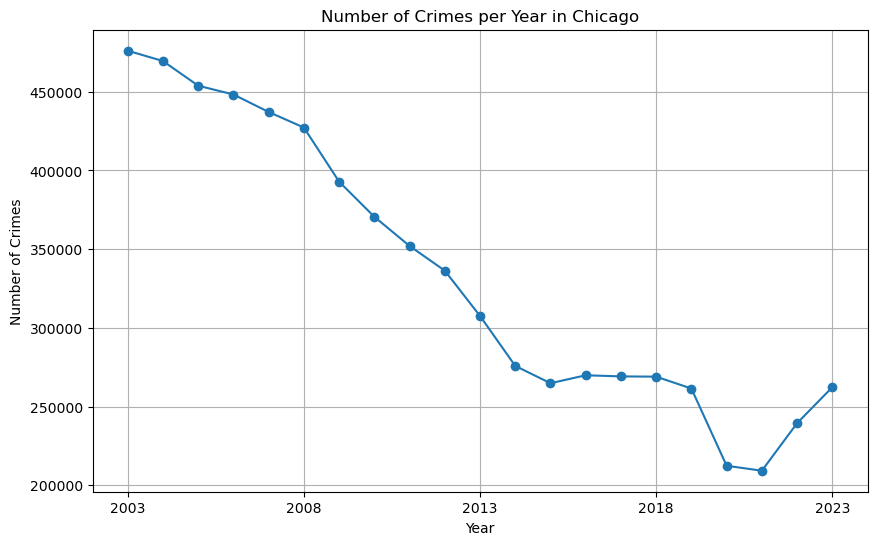

In [23]:
# Plot crime counts over the years
plt.figure(figsize=(10,6))
plt.plot(yearly_counts['Year'], yearly_counts['Count'], marker='o')
plt.title('Number of Crimes per Year in Chicago')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(range(2003, 2024, 5))
plt.grid(True)
plt.show()

### Difference by months
- H0: The means of crime rates for all months are equal.
- H1: At least one month's mean crime rate is different.

In [24]:
import scipy.stats as stats
# For statistical tests

In [25]:
# Create a new column for month
crime_db2['Month'] = crime_db2['Date'].dt.month
monthly_counts = crime_db2.groupby(['Year', 'Month']).size().reset_index(name='Count')
monthly_counts

,Year,Month,Count
0,2003,1,36723
1,2003,2,32510
2,2003,3,38652
3,2003,4,39789
4,2003,5,41197
...,...,...,...
247,2023,8,24135
248,2023,9,22584
249,2023,10,23016
250,2023,11,21332


In [26]:
# Combine Year and Month into a datetime column
monthly_counts['Date'] = pd.to_datetime(monthly_counts[['Year', 'Month']].assign(Day=1)) # Assume the day recorded is the first day of the month only for simplicity

# Sort by Date to ensure proper plotting order
monthly_counts = monthly_counts.sort_values('Date')

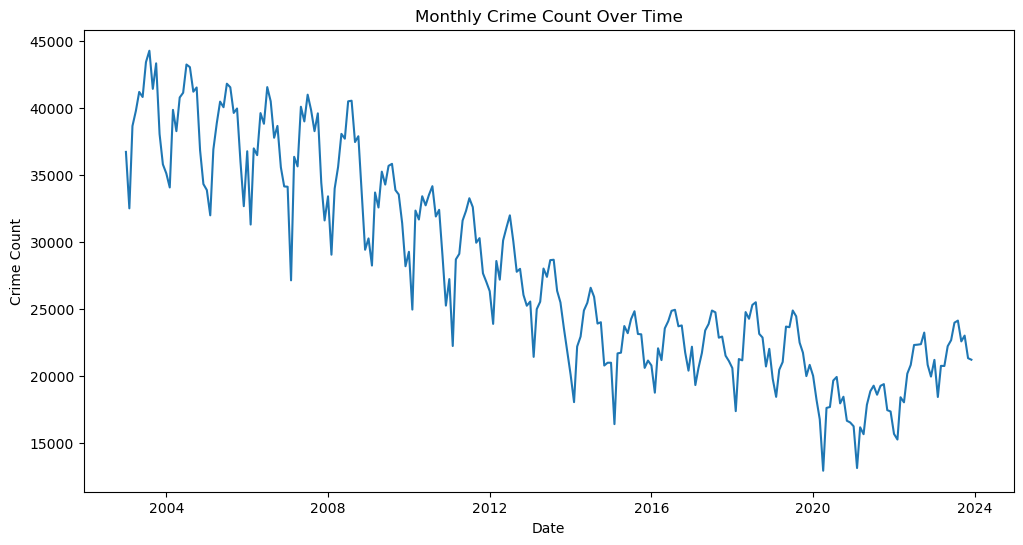

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts['Date'], monthly_counts['Count'])

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.title('Monthly Crime Count Over Time')
plt.show()

_This time series shows seasonality => appropriate for seasonal decomposition_

#### SEASONAL DECOMPOSITION

In [28]:
# Ensure your 'Date' column is set as the index
monthly_counts2 = monthly_counts.copy()
monthly_counts2 = monthly_counts2.set_index('Date')

In [29]:
monthly_counts2

,Year,Month,Count
Date,,,
2003-01-01,2003,1,36723
2003-02-01,2003,2,32510
2003-03-01,2003,3,38652
2003-04-01,2003,4,39789
2003-05-01,2003,5,41197
...,...,...,...
2023-08-01,2023,8,24135
2023-09-01,2023,9,22584
2023-10-01,2023,10,23016


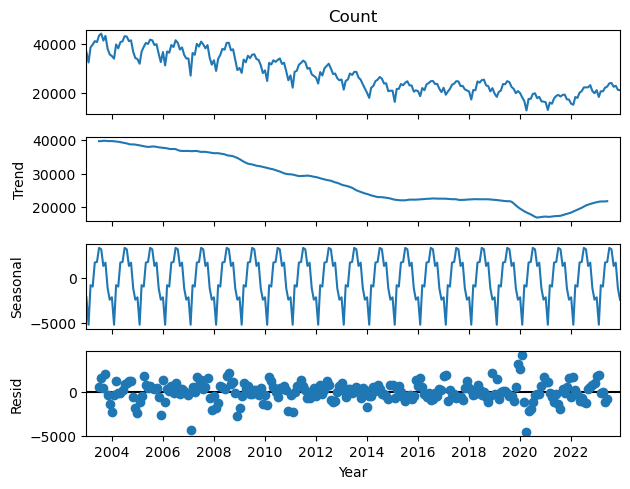

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(monthly_counts2['Count'], model='additive', period=12)  # Use 'multiplicative' if seasonal variation increases over time

# Plot the decomposition
result.plot()
plt.xlabel('Year')
plt.show()

In [31]:
result.seasonal

Date
2003-01-01   -2151.176736
2003-02-01   -5159.472569
2003-03-01    -824.764236
2003-04-01    -975.837153
2003-05-01    1661.227431
                 ...     
2023-08-01    3111.267014
2023-09-01    1284.567014
2023-10-01    1649.060764
2023-11-01   -1166.397569
2023-12-01   -2410.074653
Name: seasonal, Length: 252, dtype: float64

In [32]:
seasonal_comp = result.seasonal
seasonal_df = pd.DataFrame({
    'Date': seasonal_comp.index,
    'Seasonal_Effect': seasonal_comp.values
})
seasonal_df['Month'] = seasonal_df['Date'].dt.month

In [33]:
# Calculate average seasonal effect for each month
avg_seasonal_effect = seasonal_df.groupby('Month')['Seasonal_Effect'].mean().reset_index()
avg_seasonal_effect = avg_seasonal_effect.sort_values('Seasonal_Effect', ascending=False)

print("Average Seasonal Effect by Month:")
print(avg_seasonal_effect)

Average Seasonal Effect by Month:
    Month  Seasonal_Effect
6       7      3263.964931
7       8      3111.267014
5       6      1717.635764
4       5      1661.227431
9      10      1649.060764
8       9      1284.567014
2       3      -824.764236
3       4      -975.837153
10     11     -1166.397569
0       1     -2151.176736
11     12     -2410.074653
1       2     -5159.472569


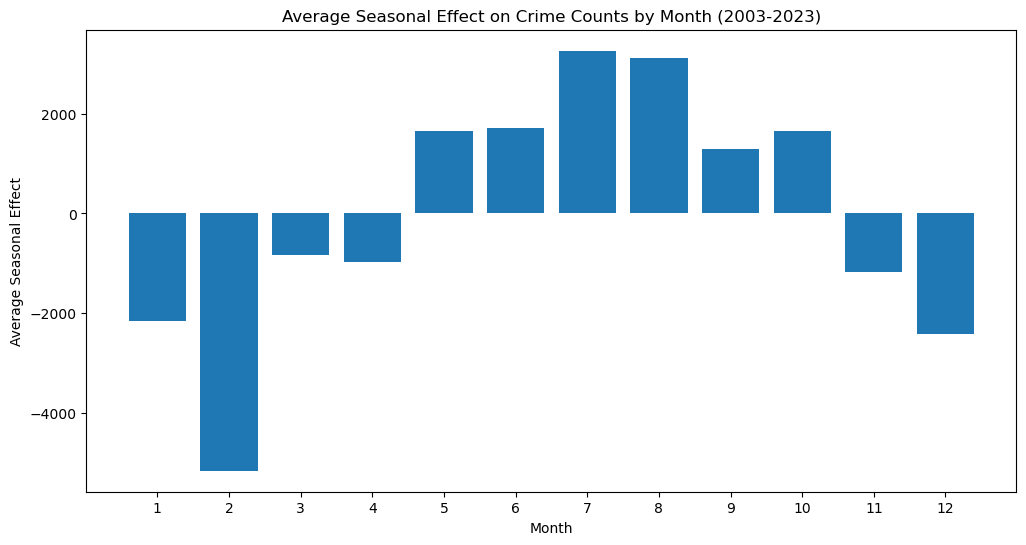

In [34]:
plt.figure(figsize=(12, 6))
plt.bar(avg_seasonal_effect['Month'], avg_seasonal_effect['Seasonal_Effect'])
plt.title('Average Seasonal Effect on Crime Counts by Month (2003-2023)')
plt.xlabel('Month')
plt.ylabel('Average Seasonal Effect')
plt.xticks(range(1, 13))
plt.show()

#### CHECK NORMALITY

In [35]:
# Pivot the data to have months as columns
monthly_pivot = monthly_counts.pivot(index='Year', columns='Month', values='Count').fillna(0)
monthly_pivot

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2003,36723,32510,38652,39789,41197,40820,43420,44272,41427,43330,38057,35792
2004,35113,34071,39858,38271,40783,41136,43243,43047,41215,41529,36843,34323
2005,33878,31990,36907,38871,40474,40057,41811,41545,39630,39961,35984,32671
2006,36771,31302,36984,36479,39619,38821,41555,40499,37777,38663,35572,34147
2007,34123,27139,36357,35641,40092,38996,40994,39849,38268,39598,34426,31609
2008,33407,29053,33985,35602,38068,37709,40496,40542,37458,37891,33564,29421
2009,30268,28243,33693,32575,35250,34285,35682,35832,33874,33546,31403,28192
2010,29269,24957,32346,31678,33414,32735,33515,34165,31903,32402,28900,25255
2011,27232,22240,28702,29116,31600,32327,33265,32604,29946,30289,27661,27032


- _H0: the sample comes from a normal distribution_
- _HA: the sample doesn't come from a normal distribution_

In [36]:
import numpy as np
from scipy.stats import shapiro

In [37]:
from scipy.stats import shapiro

shapiro_results = {}

# Loop through each month's column
for month in monthly_pivot.columns:
    # Perform Shapiro-Wilk test for normality
    stat, p_value = shapiro(monthly_pivot[month])
    
    # Store the result in a dictionary
    shapiro_results[month] = {'Shapiro-Wilk Statistic': stat, 'p-value': p_value}

# Convert the results to a DataFrame for better readability
shapiro_df = pd.DataFrame(shapiro_results).T

# Display the Shapiro-Wilk test results
shapiro_df

,Shapiro-Wilk Statistic,p-value
1,0.911315,0.058297
2,0.926484,0.117021
3,0.903306,0.040575
4,0.932017,0.151081
5,0.902301,0.038787
6,0.910865,0.057113
7,0.896759,0.030294
8,0.911227,0.058063
9,0.889898,0.022398
10,0.886445,0.019273


_There are some months that do not follow normal distribution. However, ANOVA test is robust to dataset with large sample size, so this violation can be ignored_

### Carry out Levene's test for homogeneity of variance
- H0: Variances between groups are equal
- H1: Variances between groups are not equal

In [38]:
## Create a list of each month with the values in each year
by_months = [group['Count'].values for name, group in monthly_counts.groupby('Month')]
stat, p_value = stats.levene(*by_months)
print(f'Levene’s test statistic: {stat}, p-value: {p_value}')
##p-value > 0.05 => fail to reject H0 => doesn't need transformation

Levene’s test statistic: 0.6347093009417046, p-value: 0.7982457558312139


### ANOVA TEST & AVERAGE COUNT

In [39]:
anova_result = stats.f_oneway(*[monthly_pivot[month].dropna() for month in monthly_pivot.columns])
print('ANOVA result:', anova_result)

ANOVA result: F_onewayResult(statistic=2.192800426273662, pvalue=0.015464153010753606)


- _Reject H0. The difference betwene the average value of each month is statistically significant._
- _Use mean for comparison_

In [40]:
monthly_means = monthly_pivot.mean(axis=0).reset_index(name='Average_Count')
monthly_means

,Month,Average_Count
0,1,26012.952381
1,2,22868.761905
2,3,27212.190476
3,4,27044.761905
4,5,29549.809524
5,6,29523.476190
6,7,30982.428571
7,8,30785.714286
8,9,28908.714286
9,10,29203.142857


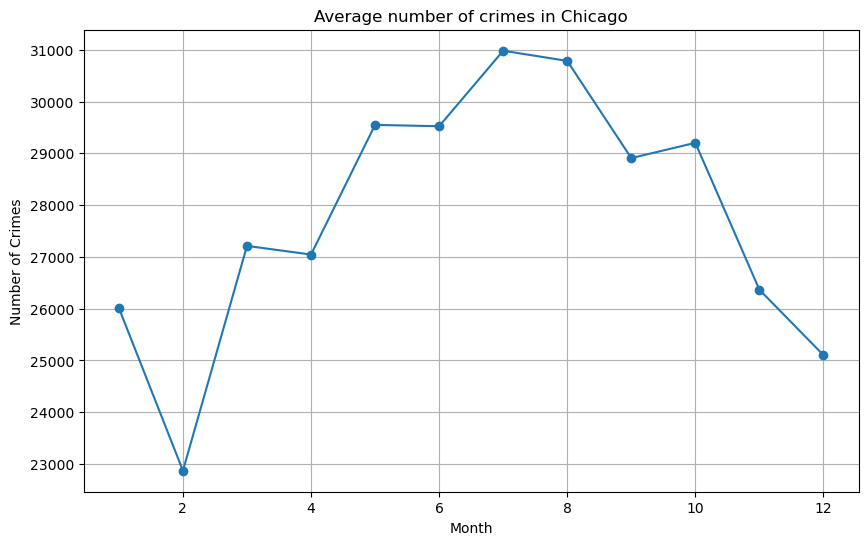

In [41]:
plt.figure(figsize=(10,6))
plt.plot(monthly_means['Month'], monthly_means['Average_Count'], marker='o')
plt.title('Average number of crimes in Chicago')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

- Winter (Dec-Feb): cold, people tend to stay indoor. February observed much lower crime number, maybe because it is post-holiday month?
- Spring (Mar-May), the weather is warmer, crime rates increase
- Highest around summer time. Peaked in July (Independence Day). Other reasons: holiday seasons, summer break. 

### DAILY PATTERN

In [42]:
crime_db2['Hour'] = crime_db2['Date'].dt.hour
hourly_counts = crime_db2.groupby(['Year', 'Hour']).size().reset_index(name='Crime Count')
hourly_counts

,Year,Hour,Crime Count
0,2003,0,27595
1,2003,1,15086
2,2003,2,12681
3,2003,3,10149
4,2003,4,7469
...,...,...,...
499,2023,19,13457
500,2023,20,13052
501,2023,21,12070
502,2023,22,11693


#### NORMALITY TEST

In [43]:
hr_gr = crime_db2.groupby(['Year', 'Hour']).size().reset_index(name='Crime Count')

In [44]:
hr_pivot = hr_gr.pivot(index='Year', columns='Hour', values='Crime Count').fillna(0)
hr_pivot

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Year,,,,,,,,,,,,,,,,,,,,,
2003,27595,15086,12681,10149,7469,6174,7068,10413,15640,18506,...,24360,24905,23771,24748,26203,27708,28118,27530,27089,22492
2004,27000,15170,12678,9896,7467,6191,7295,10382,15259,18853,...,24506,24569,22870,23078,24942,26438,27473,27248,26616,22608
2005,26230,15117,12111,9777,7357,5990,6889,9941,14875,18505,...,23105,23691,21811,22062,23942,25155,26464,26289,25903,22069
2006,26398,14920,12377,9860,7254,6206,7166,10463,15213,18598,...,21982,22933,21592,22074,23674,24905,25620,26054,25661,21424
2007,27936,14424,12161,9908,7379,5726,6636,10058,14735,18289,...,21328,22260,21040,21398,22711,24224,25105,25273,25086,20646
2008,27754,13807,11622,9140,6806,5508,6340,9446,14593,18247,...,20833,22521,20881,21342,22346,23807,24567,24716,24123,19464
2009,24147,12631,10582,8561,6265,4978,5983,8662,12900,17104,...,20283,21221,19564,19819,21148,22190,22071,21902,21124,17229
2010,20787,11751,9530,7686,5820,4557,5923,8376,12778,16546,...,19075,20012,18376,18779,19851,21029,21046,20559,20256,16503
2011,18722,11158,9391,7585,5619,4730,5905,8229,12845,16098,...,18180,19194,17804,17634,18774,20197,19591,18796,18729,15524


In [45]:
shapiro_hrs = {}

# Loop through each hour's column
for hr in hr_pivot.columns:
    # Perform Shapiro-Wilk test for normality
    stat, p_value = shapiro(hr_pivot[hr])
    
    # Store the result in a dictionary
    shapiro_hrs[hr] = {'Shapiro-Wilk Statistic': stat, 'p-value': p_value}

# Convert the results to a DataFrame for better readability
shapiro_df2 = pd.DataFrame(shapiro_hrs).T

# Display the Shapiro-Wilk test results
shapiro_df2

,Shapiro-Wilk Statistic,p-value
0,0.854021,0.004986
1,0.849728,0.004202
2,0.860974,0.006604
3,0.863283,0.007257
4,0.857465,0.005727
5,0.896839,0.030402
6,0.949799,0.337687
7,0.927581,0.123103
8,0.912748,0.062231
9,0.896159,0.029499


_There are some hours that do not follow normal distribution. However, ANOVA test is robust to dataset with large sample size, so this violation can be ignored_

#### VARIATION TEST

In [46]:
## Create a list of each hour with the values in every year
by_hr = [group['Crime Count'].values for hour, group in hr_gr.groupby('Hour')]
stat, p_value = stats.levene(*by_hr)
print(f'Levene’s test statistic: {stat}, p-value: {p_value}')
##p-value > 0.05 => fail to reject H0 => doesn't need transformation

Levene’s test statistic: 7.916041679567963, p-value: 4.68505579492289e-22


#### ANOVA TEST & AVERAGE

In [47]:
anova_result = stats.f_oneway(*[hr_pivot[hour].dropna() for hour in hr_pivot.columns])
print('ANOVA result:', anova_result)

ANOVA result: F_onewayResult(statistic=29.769798431668583, pvalue=1.6645642911078524e-77)


In [48]:
avg_hr = hr_pivot.mean(axis=0).reset_index(name='Average_Count')
avg_hr

,Hour,Average_Count
0,0,19372.761905
1,1,10557.761905
2,2,8928.714286
3,3,7258.714286
4,4,5530.190476
5,5,4652.857143
6,6,5448.809524
7,7,7714.761905
8,8,11358.952381
9,9,14570.666667


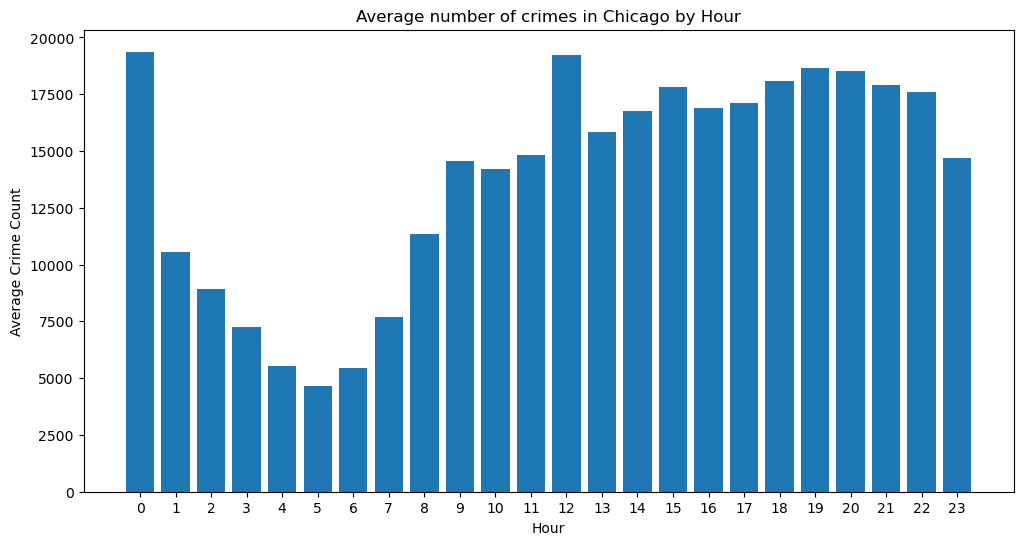

In [49]:
plt.figure(figsize=(12,6))
plt.bar(avg_hr['Hour'], avg_hr['Average_Count'])
plt.title('Average number of crimes in Chicago by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Crime Count')
plt.xticks(range(0, 24))
plt.show()

In [50]:
type_by_hr = crime_db2.groupby(['Primary Type', 'Hour']).size().reset_index(name='Crime Count')
type_by_hr

,Primary Type,Hour,Crime Count
0,ARSON,0,944
1,ARSON,1,927
2,ARSON,2,896
3,ARSON,3,842
4,ARSON,4,784
...,...,...,...
766,WEAPONS VIOLATION,19,7612
767,WEAPONS VIOLATION,20,8361
768,WEAPONS VIOLATION,21,8788
769,WEAPONS VIOLATION,22,8574


In [51]:
## Find the index of the maximum crime count for each hour
ind_max = type_by_hr.groupby('Hour')['Crime Count'].idxmax()
## Find the rows with the maximum crime count for each hour
crime_max_by_hr = type_by_hr.loc[ind_max].reset_index(drop=True)
## Drop = true to remove old index (so it is not added as a new column). Reset index to start from 0
crime_max_by_hr

,Primary Type,Hour,Crime Count
0,THEFT,0,84286
1,BATTERY,1,60290
2,BATTERY,2,53824
3,BATTERY,3,43700
4,BATTERY,4,30862
5,BATTERY,5,21542
6,THEFT,6,23374
7,THEFT,7,36828
8,THEFT,8,55508
9,THEFT,9,75951


_Quite interesting how the most occurring crime are theft and battery. Both had a specific period over the day_

In [52]:
max_crime = crime_db2.groupby(['Primary Type', 'Hour', 'Location Description']).size().reset_index(name='Count')
selected_types = ['THEFT', 'BATTERY']
max_crime = max_crime[max_crime['Primary Type'].isin(selected_types)]

In [53]:
max_crime.head(5)

,Primary Type,Hour,Location Description,Count
3725,BATTERY,0,ABANDONED BUILDING,18
3726,BATTERY,0,AIRCRAFT,9
3727,BATTERY,0,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,6
3728,BATTERY,0,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,2
3729,BATTERY,0,AIRPORT EXTERIOR - NON-SECURE AREA,8


In [54]:
max_by_hr = max_crime.loc[max_crime.groupby('Hour')['Count'].idxmax()]
max_by_hr


,Primary Type,Hour,Location Description,Count
37385,THEFT,0,STREET,30838
3869,BATTERY,1,APARTMENT,15959
3982,BATTERY,2,APARTMENT,13787
4099,BATTERY,3,APARTMENT,11733
4211,BATTERY,4,APARTMENT,9050
4320,BATTERY,5,APARTMENT,7200
38103,THEFT,6,STREET,8280
38230,THEFT,7,STREET,11436
38363,THEFT,8,STREET,14424
38496,THEFT,9,STREET,15891


In [55]:
max_by_hr = max_crime.loc[max_crime.groupby(['Primary Type','Hour'])['Count'].idxmax()]
max_by_hr

,Primary Type,Hour,Location Description,Count
3741,BATTERY,0,APARTMENT,17283
3869,BATTERY,1,APARTMENT,15959
3982,BATTERY,2,APARTMENT,13787
4099,BATTERY,3,APARTMENT,11733
4211,BATTERY,4,APARTMENT,9050
4320,BATTERY,5,APARTMENT,7200
4424,BATTERY,6,APARTMENT,6281
4536,BATTERY,7,APARTMENT,6951
4650,BATTERY,8,APARTMENT,8579
4769,BATTERY,9,APARTMENT,9745


## By type

#### _DISTRIBUTION OF PRIMARY TYPES_

In [56]:
crime_db2['Primary Type'] = crime_db2['Primary Type'].replace('NON - CRIMINAL','NON-CRIMINAL')

In [57]:
crime_db2[crime_db2['Primary Type']=='NON - CRIMINAL']

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Community Area,Year,Updated On,Location,Month,Hour


In [58]:
count_by_types = crime_db2.groupby('Primary Type').size().sort_values(ascending=False)  ## Let the Primary Type be the index => easier to plot pie chart
count_by_types

Primary Type
THEFT                                1486892
BATTERY                              1267521
CRIMINAL DAMAGE                       797196
NARCOTICS                             649378
ASSAULT                               460827
OTHER OFFENSE                         432638
BURGLARY                              378094
MOTOR VEHICLE THEFT                   343167
DECEPTIVE PRACTICE                    330468
ROBBERY                               263768
CRIMINAL TRESPASS                     190464
WEAPONS VIOLATION                     103967
PROSTITUTION                           57527
OFFENSE INVOLVING CHILDREN             52383
PUBLIC PEACE VIOLATION                 47742
CRIMINAL SEXUAL ASSAULT                32039
SEX OFFENSE                            27422
INTERFERENCE WITH PUBLIC OFFICER       18024
GAMBLING                               12726
LIQUOR LAW VIOLATION                   11981
HOMICIDE                               11702
ARSON                                  115

In [59]:
offense = crime_db2[crime_db2['Primary Type'].str.contains('offense', case=False, na=False)]
print(offense.groupby('Primary Type').size().sort_values(ascending=False))

Primary Type
OTHER OFFENSE                 432638
OFFENSE INVOLVING CHILDREN     52383
SEX OFFENSE                    27422
dtype: int64


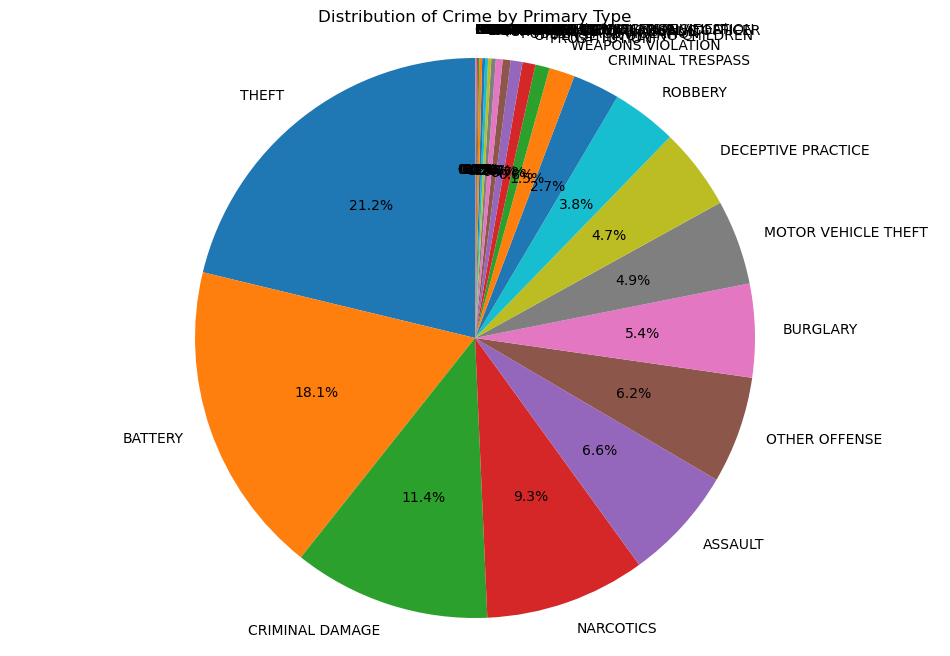

In [60]:
# Plotting the pie chart
plt.figure(figsize=(12, 8))  # Set the figure size
plt.pie(count_by_types, labels=count_by_types.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Crime by Primary Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [61]:
## Group all crimes with < 5% of total count into 'Other' category
threshold = 0.05 * count_by_types.sum()
count_by_types2 = count_by_types.copy()
count_by_types2[count_by_types < threshold] = 0 ## this is because count_by_types have index = Primary Type and value = Crime Count, so using count_by_type < threshold already means comparing the Crime Count
count_by_types2

Primary Type
THEFT                                1486892
BATTERY                              1267521
CRIMINAL DAMAGE                       797196
NARCOTICS                             649378
ASSAULT                               460827
OTHER OFFENSE                         432638
BURGLARY                              378094
MOTOR VEHICLE THEFT                        0
DECEPTIVE PRACTICE                         0
ROBBERY                                    0
CRIMINAL TRESPASS                          0
WEAPONS VIOLATION                          0
PROSTITUTION                               0
OFFENSE INVOLVING CHILDREN                 0
PUBLIC PEACE VIOLATION                     0
CRIMINAL SEXUAL ASSAULT                    0
SEX OFFENSE                                0
INTERFERENCE WITH PUBLIC OFFICER           0
GAMBLING                                   0
LIQUOR LAW VIOLATION                       0
HOMICIDE                                   0
ARSON                                     

In [62]:
count_by_types2['OTHER'] = count_by_types[count_by_types < threshold].sum() ##  label for the new row being added to the Series.
count_by_types2 = count_by_types2[count_by_types2 > 0] ## remove the rows with 0 values
count_by_types2

Primary Type
THEFT              1486892
BATTERY            1267521
CRIMINAL DAMAGE     797196
NARCOTICS           649378
ASSAULT             460827
OTHER OFFENSE       432638
BURGLARY            378094
OTHER              1532228
dtype: int64

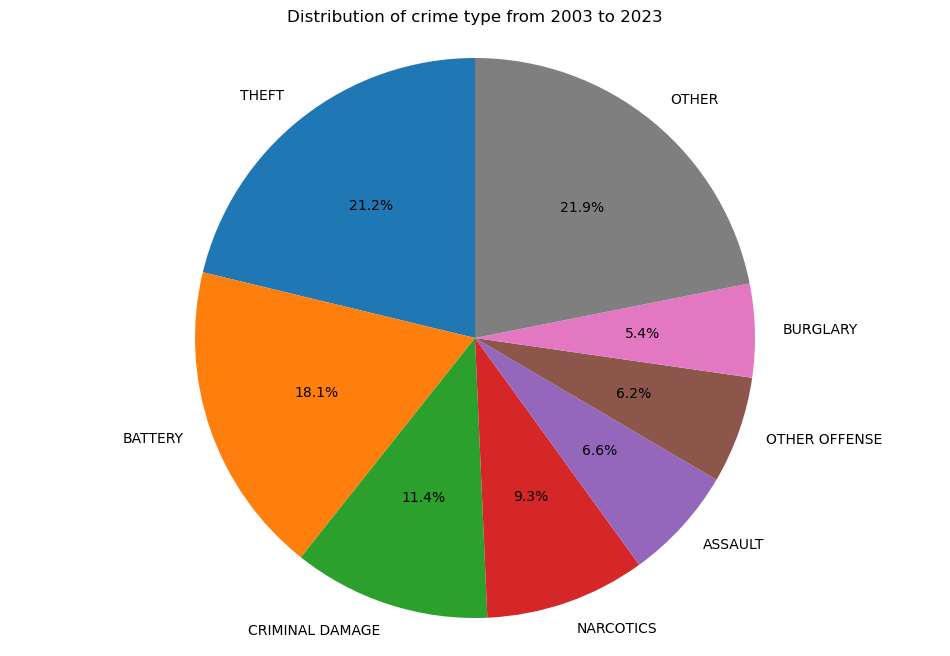

In [63]:
# Plotting the pie chart after grouping
plt.figure(figsize=(12, 8))  # Set the figure size
plt.pie(count_by_types2, labels=count_by_types2.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of crime type from 2003 to 2023')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

_Assault usually involves some kinds of tools to attack. Other offense doesn't. Other offense are those that are not offense involving children or sex offense_

#### _TOP 5 TYPES TREND_

In [64]:
type_by_yrs = crime_db2.groupby(['Primary Type', 'Year']).size().reset_index(name='Crime Count')
type_by_yrs

,Primary Type,Year,Crime Count
0,ARSON,2003,955
1,ARSON,2004,778
2,ARSON,2005,691
3,ARSON,2006,726
4,ARSON,2007,712
...,...,...,...
631,WEAPONS VIOLATION,2019,6339
632,WEAPONS VIOLATION,2020,8432
633,WEAPONS VIOLATION,2021,8978
634,WEAPONS VIOLATION,2022,8780


In [65]:
## Find the index of the maximum crime count for each year
id_max_yr = type_by_yrs.groupby('Year')['Crime Count'].idxmax()
## Find the rows with the maximum crime count for each year
crime_max_by_yrs = type_by_yrs.loc[id_max_yr].reset_index(drop=True)
## Drop = true to remove old index (so it is not added as a new column). Reset index to start from 0
crime_max_by_yrs

,Primary Type,Year,Crime Count
0,THEFT,2003,98876
1,THEFT,2004,95464
2,THEFT,2005,85684
3,THEFT,2006,86241
4,THEFT,2007,85156
5,THEFT,2008,88437
6,THEFT,2009,80976
7,THEFT,2010,76758
8,THEFT,2011,75153
9,THEFT,2012,75464


In [66]:
crime_20 = crime_db2[crime_db2['Year']==2020]
print(crime_20.groupby('Primary Type').size().sort_values(ascending=False))

Primary Type
BATTERY                              41514
THEFT                                41335
CRIMINAL DAMAGE                      24877
DECEPTIVE PRACTICE                   18480
ASSAULT                              18257
OTHER OFFENSE                        12602
MOTOR VEHICLE THEFT                   9959
BURGLARY                              8758
WEAPONS VIOLATION                     8432
ROBBERY                               7855
NARCOTICS                             7493
CRIMINAL TRESPASS                     4177
OFFENSE INVOLVING CHILDREN            2021
PUBLIC PEACE VIOLATION                1271
CRIMINAL SEXUAL ASSAULT               1247
SEX OFFENSE                            974
HOMICIDE                               796
INTERFERENCE WITH PUBLIC OFFICER       654
ARSON                                  588
PROSTITUTION                           277
STALKING                               203
INTIMIDATION                           163
CONCEALED CARRY LICENSE VIOLATION      14

In [67]:
## Filter out top 5 types with highest count to study the trend
top5 = ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT']
top5_crime = crime_db2[crime_db2['Primary Type'].isin(top5)]
top5_count = top5_crime.groupby(['Primary Type', 'Year']).size().reset_index(name='Crime Count')
top5_count

,Primary Type,Year,Crime Count
0,ASSAULT,2003,29477
1,ASSAULT,2004,28850
2,ASSAULT,2005,27067
3,ASSAULT,2006,25945
4,ASSAULT,2007,26313
...,...,...,...
100,THEFT,2019,62495
101,THEFT,2020,41335
102,THEFT,2021,40810
103,THEFT,2022,54879


In [68]:
# Convert long data format to wide data format to plot multiple lines
top5_pivot = top5_count.pivot(index='Year', columns='Primary Type', values='Crime Count').fillna(0)
top5_pivot
# top7_pivot = top7_count.pivot(index='Year', columns='Primary Type', values='Crime Count').fillna(0)
# top7_pivot

Primary Type,ASSAULT,BATTERY,CRIMINAL DAMAGE,NARCOTICS,THEFT
Year,,,,,
2003,29477,88380,55011,54288,98876
2004,28850,87136,53164,57060,95464
2005,27067,83964,54548,56234,85684
2006,25945,80666,57124,55813,86241
2007,26313,79593,53749,54454,85156
2008,25448,75930,52843,46506,88437
2009,22861,68459,47725,43543,80976
2010,21537,65402,40654,43398,76758
2011,20411,60460,37331,38605,75153


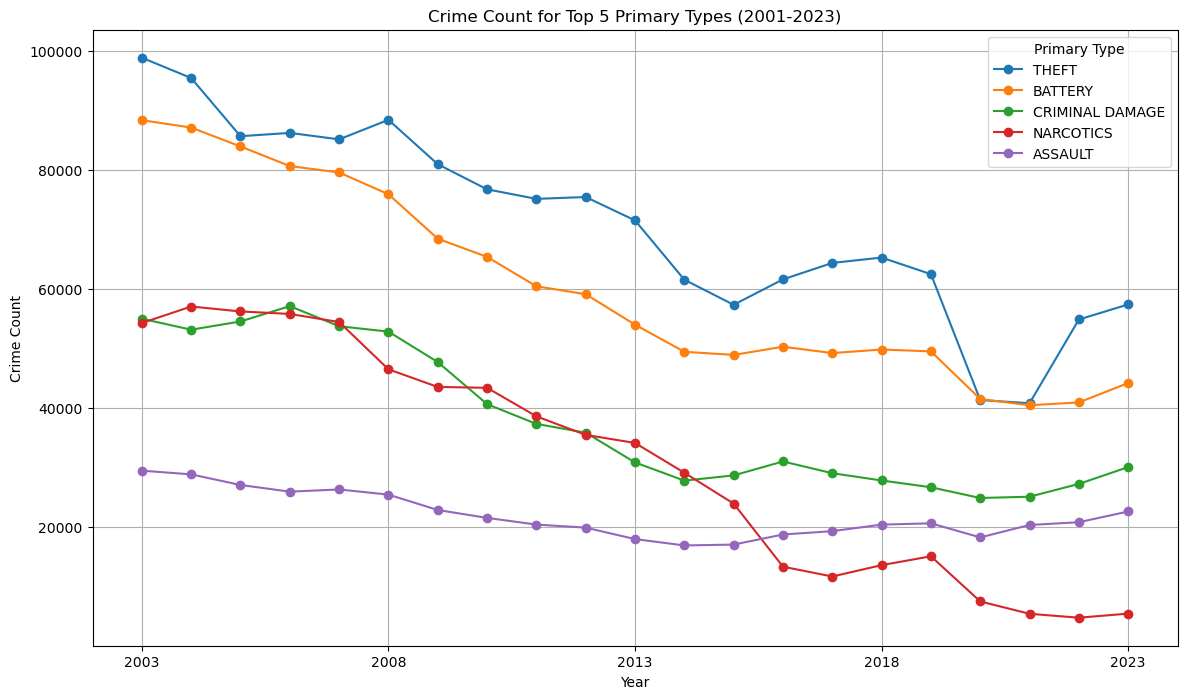

In [69]:
plt.figure(figsize=(14, 8))
for crime_type in top5:
    plt.plot(top5_pivot.index, top5_pivot[crime_type], marker='o', label=crime_type)

plt.title('Crime Count for Top 5 Primary Types (2001-2023)')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.legend(title='Primary Type')
plt.grid(True)
plt.xticks(range(2003, 2024, 5))
plt.show()

- _Tendency: All decreased over time. Both theft and narcotics had drastic decline_
- _Economic regression (2008-2009). The decline was not as significant as during COVID_
- _In 2020, battery count was the highest because theft count also dropped significantly (also need to find how COVID affected this large drop)_

## By locations

#### _GROUP GENERAL LOCATIONS TO COMMMUNITY AREA NAMES_

In [70]:
comm_area = pd.read_csv('/Users/nheechan/Desktop/data project/Crime Chicago/CommAreas.csv')
comm_area

,the_geom,PERIMETER,AREA,COMAREA_,COMAREA_ID,AREA_NUMBE,COMMUNITY,AREA_NUM_1,SHAPE_AREA,SHAPE_LEN
0,MULTIPOLYGON (((-87.60914087617894 41.84469250...,0,0,0,0,35,DOUGLAS,35,4.600462e+07,31027.054510
1,MULTIPOLYGON (((-87.59215283879394 41.81692934...,0,0,0,0,36,OAKLAND,36,1.691396e+07,19565.506153
2,MULTIPOLYGON (((-87.62879823733725 41.80189303...,0,0,0,0,37,FULLER PARK,37,1.991670e+07,25339.089750
3,MULTIPOLYGON (((-87.6067081256125 41.816813770...,0,0,0,0,38,GRAND BOULEVARD,38,4.849250e+07,28196.837157
4,MULTIPOLYGON (((-87.59215283879394 41.81692934...,0,0,0,0,39,KENWOOD,39,2.907174e+07,23325.167906
...,...,...,...,...,...,...,...,...,...,...
72,MULTIPOLYGON (((-87.69645961375822 41.70714491...,0,0,0,0,74,MOUNT GREENWOOD,74,7.558429e+07,48665.130539
73,MULTIPOLYGON (((-87.64215204651398 41.68508211...,0,0,0,0,75,MORGAN PARK,75,9.187734e+07,46396.419362
74,MULTIPOLYGON (((-87.83658087874365 41.98639611...,0,0,0,0,76,OHARE,76,3.718356e+08,173625.984660
75,MULTIPOLYGON (((-87.65455590025104 41.99816614...,0,0,0,0,77,EDGEWATER,77,4.844999e+07,31004.830946


In [71]:
print(comm_area['AREA_NUMBE'].min(), comm_area['AREA_NUMBE'].max())

1 77


In [72]:
# all_multipolygon = comm_area['the_geom'].apply(lambda x: x.startswith('MULTIPOLYGON')).all()
# print("All values start with 'MULTIPOLYGON':", all_multipolygon)

In [73]:
# all_multipolygon2 = comm_area['the_geom'].apply(lambda x: x.endswith(')')).all()
# print("All values start with 'MULTIPOLYGON':", all_multipolygon2)

In [74]:
crime_db2[crime_db2['Community Area'].isnull()]

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Community Area,Year,Updated On,Location,Month,Hour
34745,3221328,HK240294,2004-03-14 06:00:00,N WHIPPLE,THEFT,$300 AND UNDER,NaN,False,False,17.0,NaN,NaN,2004,2023-10-27 15:41:33,NaN,3,6
69171,2149,HJ357370,2003-05-12 12:53:00,S HAMLIN AVE,HOMICIDE,FIRST DEGREE MURDER,GANGWAY,True,True,11.0,NaN,NaN,2003,2023-12-10 15:40:28,"(41.8750661, -87.720451155)",5,12
69172,2074,HJ265685,2003-03-29 08:30:00,N HOMAN AVE,HOMICIDE,FIRST DEGREE MURDER,GAS STATION,True,False,11.0,NaN,NaN,2003,2023-12-10 15:40:28,"(41.882073709, -87.711042097)",3,8
103131,2849,HK548175,2004-08-10 03:25:00,N ROCKWELL AVE,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,12.0,NaN,NaN,2004,2024-01-28 15:40:59,"(36.619446395, -91.686565684)",8,3
103132,2584,HK152218,2004-01-30 07:44:00,S JEFFERY AVE,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,False,3.0,NaN,NaN,2004,2024-01-28 15:40:59,"(36.619446395, -91.686565684)",1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5433137,9108846,HW229995,2013-04-11 17:00:00,S CICERO AV,NARCOTICS,POSS: COCAINE,HOTEL/MOTEL,False,False,22.0,19.0,NaN,2013,2015-08-17 15:03:40,NaN,4,17
5496001,9211845,HW357677,2008-01-01 00:00:00,W 65TH ST,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,22.0,34.0,NaN,2008,2015-08-17 15:03:40,NaN,1,0
5539872,9314341,HW327504,2013-06-20 13:36:59,W WABANSIA,MOTOR VEHICLE THEFT,THEFT/RECOVERY: AUTOMOBILE,STREET,False,False,14.0,5.0,NaN,2013,2018-02-10 15:50:01,"(41.912350324, -87.698403651)",6,13
7436756,12130807,JD326684,2020-08-09 15:00:00,S JUSTINE ST,BATTERY,AGGRAVATED - HANDGUN,ALLEY,False,False,9.0,8.0,NaN,2020,2020-11-04 15:42:11,NaN,8,15


In [75]:
crime_db2[(crime_db2['Location'].isnull()) & (crime_db2['District'].isnull()) & (crime_db2['Ward'].isnull())]

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Community Area,Year,Updated On,Location,Month,Hour


In [76]:
print(comm_area['AREA_NUMBE'].nunique())

77


In [77]:
print(comm_area['COMAREA_'].nunique())

1


In [78]:
comparison_result = comm_area['AREA_NUMBE'] == comm_area['AREA_NUM_1']
print(comparison_result[comparison_result==False])
## So 2 columns are the same

Series([], dtype: bool)


_There are no valid community areas for 0_

In [79]:
crime_db2[crime_db2['Community Area'] < 1]

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Community Area,Year,Updated On,Location,Month,Hour
1230358,2538038,HJ118120,2003-01-04 11:30:00,N CUMBERLAND AVE,DECEPTIVE PRACTICE,BOGUS CHECK,CREDIT UNION,False,False,16.0,41.0,0.0,2003,2018-02-10 15:50:01,"(41.970514812, -87.83665128)",1,11
1315961,2665242,HJ278805,2003-04-03 21:45:00,N OTTO AVE,CRIMINAL DAMAGE,TO PROPERTY,COMMERCIAL / BUSINESS OFFICE,False,False,31.0,41.0,0.0,2003,2018-10-26 16:01:05,"(41.973533721, -87.866808789)",4,21
1319079,2655567,HJ266893,2003-03-28 23:50:00,S RUTHERFORD AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,8.0,23.0,0.0,2003,2018-02-10 15:50:01,"(41.798793178, -87.790540964)",3,23
1340330,2540072,HJ119804,2003-01-11 08:55:00,N CUMBERLAND AVE,ASSAULT,SIMPLE,STREET,False,False,16.0,41.0,0.0,2003,2018-02-28 15:56:25,"(41.970690436, -87.836649916)",1,8
1475097,2752209,HJ392417,2003-05-28 14:30:00,N CUMBERLAND AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,OTHER,False,False,16.0,41.0,0.0,2003,2018-02-28 15:56:25,"(41.970514812, -87.83665128)",5,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4855995,8197932,HT431857,2011-08-04 17:00:00,S RUTHERFORD AVE,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,8.0,23.0,0.0,2011,2018-02-10 15:50:01,"(41.798979817, -87.790546724)",8,17
4866906,8274387,HT507295,2011-09-21 12:45:00,N CUMBERLAND AVE,BATTERY,SIMPLE,CTA PLATFORM,False,False,16.0,41.0,0.0,2011,2018-02-10 15:50:01,"(41.970514812, -87.83665128)",9,12
4966167,8150814,HT384983,2011-07-07 14:00:00,S RUTHERFORD AVE,ASSAULT,SIMPLE,RESIDENTIAL YARD (FRONT/BACK),False,True,8.0,23.0,0.0,2011,2018-02-10 15:50:01,"(41.798979817, -87.790546724)",7,14
4999699,8487665,HV164869,2012-02-19 18:54:00,S RUTHERFORD AVE,CRIMINAL DAMAGE,CRIMINAL DEFACEMENT,RESIDENCE-GARAGE,False,False,8.0,23.0,0.0,2012,2018-02-10 15:50:01,"(41.799089601, -87.790549465)",2,18


In [80]:
## Check the number of missing values for each year
empty_comm = crime_db2[(crime_db2['Community Area'].isnull())|(crime_db2['Community Area'] < 1)]
empty_comm_by_yr = empty_comm.groupby('Year').size().reset_index(name='Count')
empty_comm_by_yr.sort_values('Year', ascending=True)

,Year,Count
0,2003,56
1,2004,83
2,2005,57
3,2006,61
4,2007,164
5,2008,254
6,2009,224
7,2010,188
8,2011,186
9,2012,27


In [81]:
joined_loc = pd.merge(crime_db2, comm_area, left_on='Community Area', right_on='AREA_NUMBE', how='inner')
joined_loc.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'District', 'Ward',
       'Community Area', 'Year', 'Updated On', 'Location', 'Month', 'Hour',
       'the_geom', 'PERIMETER', 'AREA', 'COMAREA_', 'COMAREA_ID', 'AREA_NUMBE',
       'COMMUNITY', 'AREA_NUM_1', 'SHAPE_AREA', 'SHAPE_LEN'],
      dtype='object')

In [82]:
comm_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   the_geom    77 non-null     object 
 1   PERIMETER   77 non-null     int64  
 2   AREA        77 non-null     int64  
 3   COMAREA_    77 non-null     int64  
 4   COMAREA_ID  77 non-null     int64  
 5   AREA_NUMBE  77 non-null     int64  
 6   COMMUNITY   77 non-null     object 
 7   AREA_NUM_1  77 non-null     int64  
 8   SHAPE_AREA  77 non-null     float64
 9   SHAPE_LEN   77 non-null     float64
dtypes: float64(2), int64(6), object(2)
memory usage: 6.1+ KB


In [83]:
crime_db2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7004774 entries, 0 to 8113944
Data columns (total 17 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Case Number           object        
 2   Date                  datetime64[ns]
 3   Block                 object        
 4   Primary Type          object        
 5   Description           object        
 6   Location Description  object        
 7   Arrest                bool          
 8   Domestic              bool          
 9   District              float64       
 10  Ward                  float64       
 11  Community Area        float64       
 12  Year                  int64         
 13  Updated On            datetime64[ns]
 14  Location              object        
 15  Month                 int32         
 16  Hour                  int32         
dtypes: bool(2), datetime64[ns](2), float64(3), int32(2), int64(2), object(6)
memory usage: 81

In [84]:
joined_loc.drop(columns=['Location', 'the_geom','AREA_NUMBE', 'COMAREA_', 'AREA_NUM_1', 'PERIMETER', 'AREA', 'AREA_NUM_1', 'COMAREA_ID', 'AREA_NUM_1', 'SHAPE_AREA', 'SHAPE_LEN'], inplace=True)
joined_loc

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Community Area,Year,Updated On,Month,Hour,COMMUNITY
0,5741943,HN549294,2007-08-25 09:22:18,N ROGERS AVE,ASSAULT,SIMPLE,OTHER,False,False,24.0,49.0,1.0,2007,2015-08-17 15:03:40,8,9,ROGERS PARK
1,25953,JE240540,2021-05-24 15:06:00,N LARAMIE AVE,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,25.0,36.0,19.0,2021,2023-11-18 15:39:49,5,15,BELMONT CRAGIN
2,26038,JE279849,2021-06-26 09:24:00,N MC CORMICK RD,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,17.0,50.0,13.0,2021,2023-11-18 15:39:49,6,9,NORTH PARK
3,13279676,JG507211,2023-11-09 07:30:00,W BYRON ST,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,19.0,47.0,5.0,2023,2023-11-18 15:39:49,11,7,NORTH CENTER
4,13274752,JG501049,2023-11-12 07:59:00,S COTTAGE GROVE AVE,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,6.0,6.0,44.0,2023,2023-12-09 15:41:24,11,7,CHATHAM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003463,13047495,JG229914,2023-04-18 08:00:00,N JEFFERSON ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,12.0,42.0,28.0,2023,2023-08-19 15:40:26,4,8,NEAR WEST SIDE
7003464,13168300,JG373901,2023-08-07 18:00:00,W 95TH ST,ROBBERY,ARMED - HANDGUN,SIDEWALK,False,False,6.0,9.0,49.0,2023,2023-08-19 15:40:26,8,18,ROSELAND
7003465,13114024,JG309527,2023-06-20 19:00:00,S AVERS AVE,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,10.0,22.0,30.0,2023,2023-08-19 15:40:26,6,19,SOUTH LAWNDALE
7003466,13188860,JG398340,2023-08-26 00:00:00,S SOUTH SHORE DR,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,4.0,7.0,46.0,2023,2023-09-02 15:41:45,8,0,SOUTH CHICAGO


In [85]:
joined_loc.rename(columns={'COMMUNITY': 'Community'}, inplace=True)

In [86]:
print(joined_loc.groupby('Year').size().reset_index(name='Count'))

    Year   Count
0   2003  475933
1   2004  469349
2   2005  453722
3   2006  448128
4   2007  436928
5   2008  426942
6   2009  392619
7   2010  370351
8   2011  351828
9   2012  336308
10  2013  307563
11  2014  275842
12  2015  264846
13  2016  269903
14  2017  269188
15  2018  269021
16  2019  261485
17  2020  212447
18  2021  209291
19  2022  239461
20  2023  262313


In [87]:
by_comm_area = joined_loc.groupby('Community').size().reset_index(name='Crime Count')
by_comm_area.sort_values('Crime Count', ascending=False).head(20)

,Community,Crime Count
5,AUSTIN,436108
47,NEAR NORTH SIDE,248268
65,SOUTH SHORE,231702
32,HUMBOLDT PARK,217782
49,NEAR WEST SIDE,213631
52,NORTH LAWNDALE,206250
75,WEST TOWN,203612
4,AUBURN GRESHAM,199048
70,WEST ENGLEWOOD,198315
61,ROSELAND,186135


In [88]:
by_comm_area.sort_values('Crime Count', ascending=True).head()

,Community,Crime Count
22,EDISON PARK,7022
12,BURNSIDE,10522
24,FOREST GLEN,13105
46,MOUNT GREENWOOD,15658
30,HEGEWISCH,15708


In [89]:
top5_names = ['AUSTIN', 'NEAR NORTH SIDE', 'SOUTH SHORE', 'HUMBOLDT PARK', 'NEAR WEST SIDE']
top5_comm = joined_loc[joined_loc['Community'].isin(top5_names)]
top5_comm

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Community Area,Year,Updated On,Month,Hour,Community
6,13210088,JG423627,2023-08-31 12:00:00,W JACKSON BLVD,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,STREET,False,False,12.0,27.0,28.0,2023,2023-09-16 15:41:56,8,12,NEAR WEST SIDE
7,13210004,JG422532,2023-07-24 21:45:00,S JEFFERY BLVD,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,False,3.0,7.0,43.0,2023,2023-09-16 15:41:56,7,21,SOUTH SHORE
17,13272487,JG498648,2023-11-10 05:30:00,N AUSTIN AVE,THEFT,OVER $500,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,25.0,29.0,25.0,2023,2023-11-18 15:40:25,11,5,AUSTIN
19,13276884,JG503649,2023-11-10 17:30:00,W AUGUSTA BLVD,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,11.0,37.0,23.0,2023,2023-11-18 15:40:25,11,17,HUMBOLDT PARK
31,12601676,JF124024,2022-01-13 16:00:00,W AUGUSTA BLVD,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,12.0,36.0,23.0,2022,2023-09-14 15:41:59,1,16,HUMBOLDT PARK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003451,13064107,JG249781,2023-05-06 00:22:00,E OHIO ST,BATTERY,DOMESTIC BATTERY SIMPLE,ALLEY,False,True,18.0,42.0,8.0,2023,2023-08-19 15:40:26,5,0,NEAR NORTH SIDE
7003454,13138507,JG338622,2023-07-12 17:30:00,S LOOMIS ST,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,False,True,12.0,28.0,28.0,2023,2023-08-19 15:40:26,7,17,NEAR WEST SIDE
7003457,13095091,JG287007,2023-06-03 17:30:00,N MICHIGAN AVE,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,HOTEL / MOTEL,False,False,18.0,42.0,8.0,2023,2023-08-19 15:40:26,6,17,NEAR NORTH SIDE
7003461,13075643,JG263877,2023-05-16 14:00:00,W JACKSON BLVD,CRIMINAL DAMAGE,TO VEHICLE,VEHICLE NON-COMMERCIAL,False,False,15.0,28.0,25.0,2023,2023-08-19 15:40:26,5,14,AUSTIN


In [90]:
comm_by_yr = top5_comm.groupby(['Community', 'Year']).size().reset_index(name='Crime Count')
comm_by_yr

,Community,Year,Crime Count
0,AUSTIN,2003,30840
1,AUSTIN,2004,29491
2,AUSTIN,2005,28379
3,AUSTIN,2006,28898
4,AUSTIN,2007,28543
...,...,...,...
100,SOUTH SHORE,2019,8697
101,SOUTH SHORE,2020,7827
102,SOUTH SHORE,2021,7466
103,SOUTH SHORE,2022,8311


In [91]:
comm_pivot = comm_by_yr.pivot(index='Year', columns='Community', values='Crime Count').fillna(0)
comm_pivot.columns

Index(['AUSTIN', 'HUMBOLDT PARK', 'NEAR NORTH SIDE', 'NEAR WEST SIDE',
       'SOUTH SHORE'],
      dtype='object', name='Community')

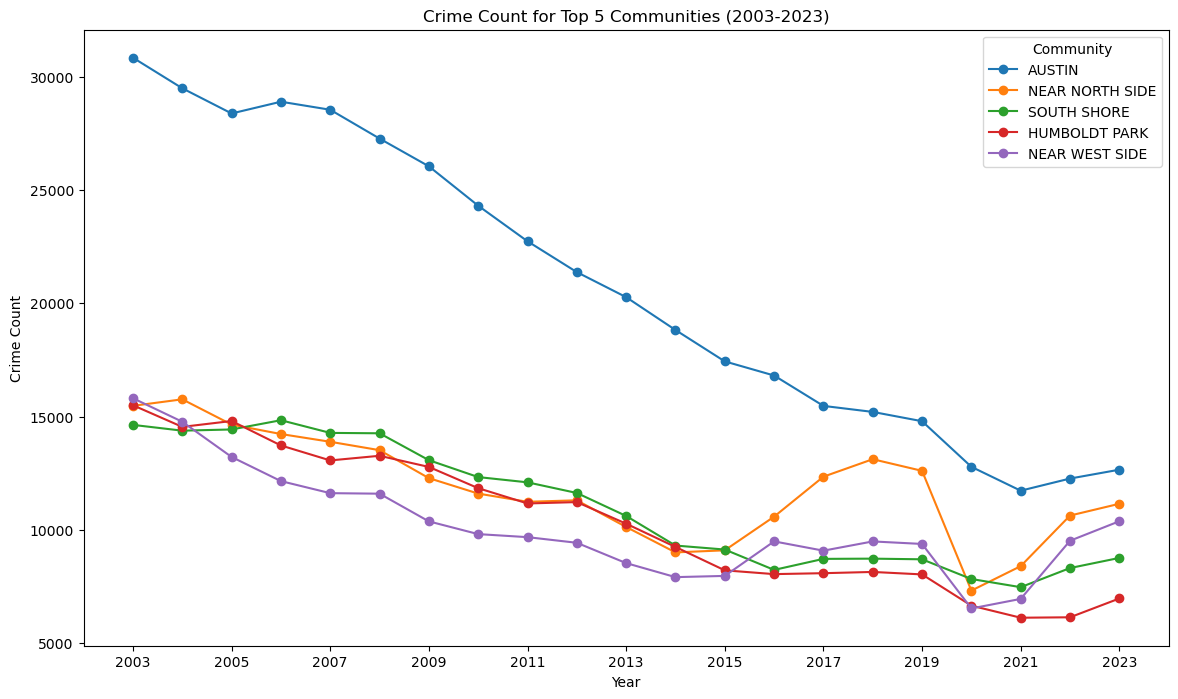

In [92]:
plt.figure(figsize=(14, 8))
for comm_name in top5_names:
    plt.plot(comm_pivot.index, comm_pivot[comm_name], marker='o', label=comm_name)

plt.title('Crime Count for Top 5 Communities (2003-2023)')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.xticks(ticks=range(2003, 2024,2))  # Set x-ticks to be whole years from 2003 to 2023
plt.legend(title='Community')
plt.show()

_Austin had significanly higher number of crimes compared to other communities until 2017_

In [93]:
austin_db = joined_loc[joined_loc['Community']=='AUSTIN']
austin_db = austin_db.dropna(subset=['Location Description'])
austin_db['Location Description'] = austin_db['Location Description'].replace({'PARKING LOT / GARAGE (NON RESIDENTIAL)':'PARKING LOT/GARAGE(NON.RESID.)'})
aus_loc_desc = austin_db.groupby('Location Description').size().reset_index(name='Crime Count')

In [94]:
aus_loc_desc.sort_values('Crime Count', ascending=False).head(10)

,Location Description,Crime Count
130,STREET,113759
125,SIDEWALK,76203
107,RESIDENCE,62942
10,APARTMENT,61545
8,ALLEY,14807
92,OTHER,9943
99,PARKING LOT/GARAGE(NON.RESID.),9266
145,VEHICLE NON-COMMERCIAL,8835
111,RESIDENCE PORCH/HALLWAY,8257
69,GAS STATION,6114


#### _BY SPECIFIC LOCATIONS_

In [95]:
crime_db2[crime_db2['Location Description'].isnull()]

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Community Area,Year,Updated On,Location,Month,Hour
421,13207457,JG419448,2023-09-06 14:20:00,N OCONTO AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,16.0,29.0,17.0,2023,2023-09-14 15:43:09,"(41.938825971, -87.807986017)",9,14
894,13209655,JG422078,2023-05-30 09:30:00,W WASHINGTON ST,DECEPTIVE PRACTICE,COMPUTER FRAUD,NaN,False,False,1.0,42.0,32.0,2023,2023-09-16 15:41:56,"(41.883202953, -87.635823077)",5,9
1147,13203348,JG415071,2023-09-07 14:35:00,S NATCHEZ AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,8.0,23.0,56.0,2023,2023-09-15 15:42:23,"(41.79682922, -87.784389067)",9,14
1522,13209657,JG422289,2023-02-02 08:15:00,N HONORE ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,14.0,32.0,22.0,2023,2023-09-15 15:41:25,"(41.914764369, -87.673903013)",2,8
1696,13206379,JG418537,2007-01-01 16:40:00,S SHORE DR,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,2.0,5.0,41.0,2007,2023-09-16 15:42:58,NaN,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8112820,13042362,JG223644,2023-04-14 18:45:00,W BYRON ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,17.0,33.0,16.0,2023,2023-08-19 15:40:26,"(41.952046798, -87.712185341)",4,18
8113092,13078297,JG266303,2023-02-01 12:00:00,S MAY ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,9.0,11.0,60.0,2023,2023-08-19 15:40:26,"(41.836677863, -87.654768272)",2,12
8113518,13048752,JG230353,2023-04-19 22:35:00,S EDBROOKE AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,5.0,9.0,49.0,2023,2023-08-19 15:40:26,"(41.69026756, -87.619568317)",4,22
8113684,13048696,JG230576,2023-04-19 13:20:00,N WABASH AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,18.0,42.0,8.0,2023,2023-08-19 15:40:26,"(41.888993854, -87.626934833)",4,13


In [96]:
## Drop rows with missing values in Location Description
crime_db3 = crime_db2.dropna(subset=['Location Description'])
crime_db3['Location Description'] = crime_db3['Location Description'].replace({'PARKING LOT / GARAGE (NON RESIDENTIAL)':'PARKING LOT/GARAGE(NON.RESID.)'})
by_loc_desc = crime_db3.groupby('Location Description').size().reset_index(name='Crime Count')

/var/folders/_m/nd4zplkd1xd1v4xx1_w8jp1r0000gn/T/ipykernel_11195/3022852558.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_db3['Location Description'] = crime_db3['Location Description'].replace({'PARKING LOT / GARAGE (NON RESIDENTIAL)':'PARKING LOT/GARAGE(NON.RESID.)'})


In [97]:
crime_db3['Location Description'].unique()

array(['OTHER', 'STREET', 'PARKING LOT', 'APARTMENT',
       'SMALL RETAIL STORE', 'PARKING LOT/GARAGE(NON.RESID.)',
       'RESIDENCE - GARAGE', 'RESIDENCE - PORCH / HALLWAY',
       'CURRENCY EXCHANGE', 'RESIDENCE', 'AUTO / BOAT / RV DEALERSHIP',
       'POLICE FACILITY / VEHICLE PARKING LOT', 'DEPARTMENT STORE',
       'CHA PARKING LOT / GROUNDS', 'RESTAURANT', 'GROCERY FOOD STORE',
       'APPLIANCE STORE', 'CAR WASH', 'HOSPITAL BUILDING / GROUNDS',
       'COMMERCIAL / BUSINESS OFFICE', 'SIDEWALK',
       'DRIVEWAY - RESIDENTIAL', 'OTHER (SPECIFY)', 'PARK PROPERTY',
       'ALLEY', 'BANK', 'DRUG STORE', 'VEHICLE NON-COMMERCIAL',
       'RESIDENCE - YARD (FRONT / BACK)', 'BAR OR TAVERN',
       'LAKEFRONT / WATERFRONT / RIVERBANK', 'SCHOOL - PUBLIC BUILDING',
       'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA',
       'NURSING / RETIREMENT HOME', 'HOTEL / MOTEL', 'CONVENIENCE STORE',
       'GAS STATION', 'CTA BUS STOP',
       'AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA',
    

In [98]:
by_loc_desc.sort_values('Crime Count', ascending=False).head(10)

,Location Description,Crime Count
183,STREET,1784419
154,RESIDENCE,1144805
17,APARTMENT,850644
178,SIDEWALK,674927
135,OTHER,228305
142,PARKING LOT/GARAGE(NON.RESID.),202737
15,ALLEY,155645
179,SMALL RETAIL STORE,137133
175,"SCHOOL, PUBLIC, BUILDING",125062
161,RESTAURANT,117597


_Ignore 'Other' in Location Description_

In [99]:
top5_desc=top5_comm.groupby('Location Description').size().reset_index(name='Crime Count').sort_values('Crime Count', ascending=False)
top5_desc.head(10)

,Location Description,Crime Count
156,STREET,333102
13,APARTMENT,180679
151,SIDEWALK,171797
131,RESIDENCE,154811
115,OTHER,46952
123,PARKING LOT/GARAGE(NON.RESID.),33803
138,RESTAURANT,30895
11,ALLEY,30553
152,SMALL RETAIL STORE,27485
70,DEPARTMENT STORE,24718


In [100]:
top5_desc_type = joined_loc[(joined_loc['Community'].isin(top5_names)) & (joined_loc['Primary Type'].isin(top5))]
top5_desc_type

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Community Area,Year,Updated On,Month,Hour,Community
17,13272487,JG498648,2023-11-10 05:30:00,N AUSTIN AVE,THEFT,OVER $500,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,25.0,29.0,25.0,2023,2023-11-18 15:40:25,11,5,AUSTIN
60,13190179,JG399829,2023-08-27 13:16:00,W NORTH AVE,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,14.0,26.0,23.0,2023,2023-09-14 15:41:59,8,13,HUMBOLDT PARK
63,13192516,JG402535,2023-08-29 13:59:00,N LOCKWOOD AVE,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,True,True,25.0,37.0,25.0,2023,2023-09-14 15:41:59,8,13,AUSTIN
97,13273800,JG499340,2023-11-10 18:00:00,S WESTERN AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,True,12.0,28.0,28.0,2023,2023-11-18 15:40:25,11,18,NEAR WEST SIDE
99,13273013,JG499374,2023-11-10 18:30:00,S DORCHESTER AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,3.0,8.0,43.0,2023,2023-11-18 15:40:25,11,18,SOUTH SHORE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003428,13149345,JG351621,2023-07-21 21:50:00,N LARRABEE ST,THEFT,RETAIL THEFT,DEPARTMENT STORE,False,False,18.0,27.0,8.0,2023,2023-08-19 15:40:26,7,21,NEAR NORTH SIDE
7003430,13163204,JG368023,2023-08-03 15:10:00,W BLOOMINGDALE AVE,ASSAULT,SIMPLE,PARK PROPERTY,False,False,25.0,29.0,25.0,2023,2023-08-19 15:40:26,8,15,AUSTIN
7003440,13188839,JG398234,2023-08-26 09:15:00,W NORTH AVE,THEFT,RETAIL THEFT,DRUG STORE,False,False,25.0,37.0,25.0,2023,2023-09-03 15:43:16,8,9,AUSTIN
7003451,13064107,JG249781,2023-05-06 00:22:00,E OHIO ST,BATTERY,DOMESTIC BATTERY SIMPLE,ALLEY,False,True,18.0,42.0,8.0,2023,2023-08-19 15:40:26,5,0,NEAR NORTH SIDE


In [101]:
top5_desc_type.groupby(['Location Description']).size().reset_index(name='Crime Count').sort_values('Crime Count', ascending=False).head(10)

,Location Description,Crime Count
120,STREET,224318
116,SIDEWALK,137334
13,APARTMENT,122130
99,RESIDENCE,86991
87,OTHER,29616
94,PARKING LOT/GARAGE(NON.RESID.),25636
11,ALLEY,22414
106,RESTAURANT,21803
55,DEPARTMENT STORE,20878
117,SMALL RETAIL STORE,20308


_Top 5 location desc are the same if taking into account top 5 communities and top 5 crime types_

## Crime resolution

In [102]:
crime_db2.groupby('Arrest').size()

Arrest
False    5229485
True     1775289
dtype: int64

_The unresolved crime is 3 times the resolved crime. Why?_

In [103]:
yearly_arrest = crime_db2.groupby(['Year', 'Arrest']).size().reset_index(name='Count')
yearly_arrest

,Year,Arrest,Count
0,2003,False,334389
1,2003,True,141600
2,2004,False,324728
3,2004,True,144704
4,2005,False,312851
5,2005,True,140928
6,2006,False,312764
7,2006,True,135425
8,2007,False,305211
9,2007,True,131881


In [104]:
yearly_arrest_pivot = yearly_arrest.pivot(index='Year', columns='Arrest', values='Count').fillna(0)
yearly_arrest_pivot

Arrest,False,True
Year,,
2003,334389,141600
2004,324728,144704
2005,312851,140928
2006,312764,135425
2007,305211,131881
2008,317170,110026
2009,282003,110840
2010,269984,100555
2011,255715,96299


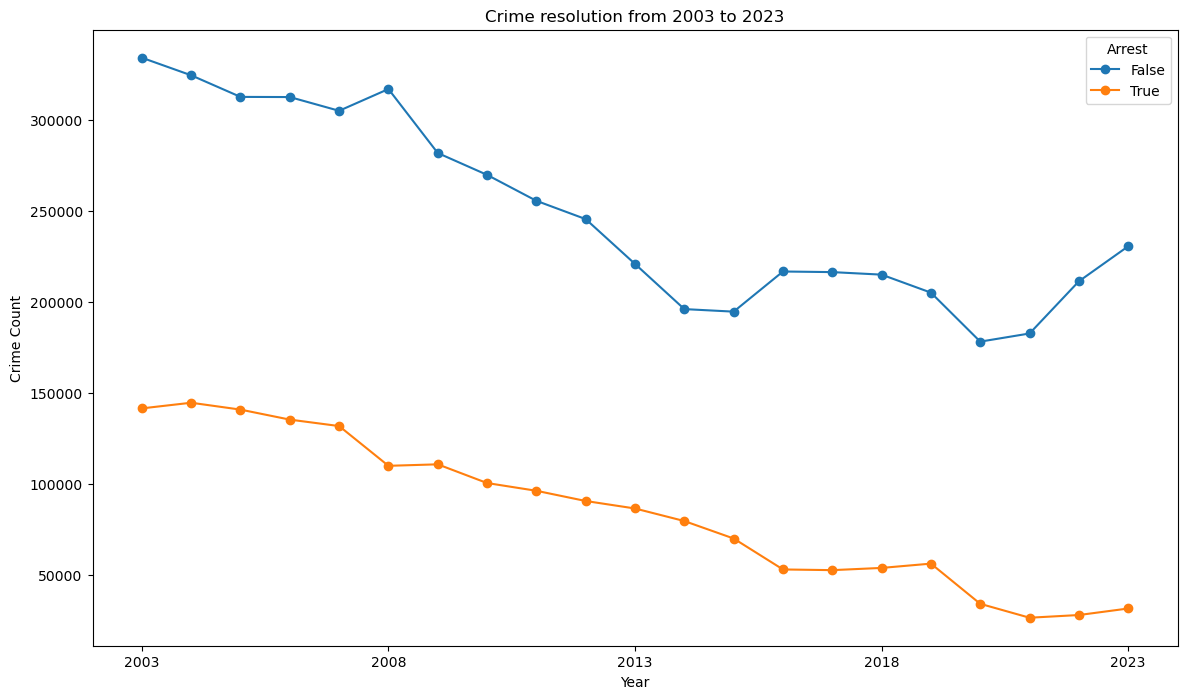

In [105]:
plt.figure(figsize=(14, 8))
for arrest in yearly_arrest_pivot.columns:
    plt.plot(yearly_arrest_pivot.index, yearly_arrest_pivot[arrest], marker='o', label=arrest)
plt.title('Crime resolution from 2003 to 2023')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.xticks(ticks=range(2003, 2024,5))  # Set x-ticks to be whole years from 2003 to 2023
plt.legend(title='Arrest')
plt.show()

#### UNRESOLVED CRIME

In [106]:
unarrested = crime_db2[crime_db2['Arrest']==False]
unarrested.drop(columns=(['Location', 'District', 'Ward']), inplace=True)

/var/folders/_m/nd4zplkd1xd1v4xx1_w8jp1r0000gn/T/ipykernel_11195/2145788130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unarrested.drop(columns=(['Location', 'District', 'Ward']), inplace=True)


In [107]:
unarrested

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Community Area,Year,Updated On,Month,Hour
0,5741943,HN549294,2007-08-25 09:22:18,N ROGERS AVE,ASSAULT,SIMPLE,OTHER,False,False,1.0,2007,2015-08-17 15:03:40,8,9
3,13279676,JG507211,2023-11-09 07:30:00,W BYRON ST,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,5.0,2023,2023-11-18 15:39:49,11,7
6,13203321,JG415333,2023-09-06 17:00:00,N WELLS ST,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,32.0,2023,2023-11-04 15:40:18,9,17
7,13210088,JG423627,2023-08-31 12:00:00,W JACKSON BLVD,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,STREET,False,False,28.0,2023,2023-09-16 15:41:56,8,12
8,13210004,JG422532,2023-07-24 21:45:00,S JEFFERY BLVD,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,False,43.0,2023,2023-09-16 15:41:56,7,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8113940,13047495,JG229914,2023-04-18 08:00:00,N JEFFERSON ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,28.0,2023,2023-08-19 15:40:26,4,8
8113941,13168300,JG373901,2023-08-07 18:00:00,W 95TH ST,ROBBERY,ARMED - HANDGUN,SIDEWALK,False,False,49.0,2023,2023-08-19 15:40:26,8,18
8113942,13114024,JG309527,2023-06-20 19:00:00,S AVERS AVE,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,30.0,2023,2023-08-19 15:40:26,6,19
8113943,13188860,JG398340,2023-08-26 00:00:00,S SOUTH SHORE DR,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,46.0,2023,2023-09-02 15:41:45,8,0


In [108]:
unarrested['Duration']=unarrested['Updated On']-unarrested['Date']

/var/folders/_m/nd4zplkd1xd1v4xx1_w8jp1r0000gn/T/ipykernel_11195/3415581457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unarrested['Duration']=unarrested['Updated On']-unarrested['Date']


In [109]:
unarrested['Duration'] = unarrested['Duration'].dt.days

/var/folders/_m/nd4zplkd1xd1v4xx1_w8jp1r0000gn/T/ipykernel_11195/533506107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unarrested['Duration'] = unarrested['Duration'].dt.days


In [110]:
unarrested.sort_values('Duration', ascending=True).head(10)

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Community Area,Year,Updated On,Month,Hour,Duration
7485457,12342950,JE202608,2021-04-18 02:01:00,S CORNELL AVE,BATTERY,AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS ...,APARTMENT,False,True,43.0,2021,2021-04-21 15:39:55,4,2,3
6991539,11525634,JB540318,2018-12-03 16:30:00,N ST LOUIS AVE,BURGLARY,UNLAWFUL ENTRY,RESIDENCE,False,False,13.0,2018,2018-12-09 16:03:03,12,16,5
6985621,11533147,JB548905,2018-12-09 23:30:00,N KILDARE AVE,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,26.0,2018,2018-12-15 16:03:22,12,23,5
7657346,12456146,JE341414,2021-08-18 00:00:00,S SAWYER AVE,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,True,70.0,2021,2021-08-23 15:40:42,8,0,5
6926405,11499295,JB505499,2018-11-04 20:00:00,N BELL AVE,THEFT,$500 AND UNDER,STREET,False,False,24.0,2018,2018-11-11 16:10:33,11,20,6
7544844,12373034,JE239194,2021-05-22 20:03:00,S LA SALLE ST,ASSAULT,"PROTECTED EMPLOYEE - HANDS, FISTS, FEET, NO / ...",STREET,False,False,53.0,2021,2021-05-29 15:40:48,5,20,6
7544843,12408755,JE283591,2021-06-25 23:00:00,W HASTINGS ST,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,28.0,2021,2021-07-02 15:40:59,6,23,6
6926402,11500362,JB506819,2018-11-06 20:00:00,S CENTRAL AVE,THEFT,OVER $500,STREET,False,False,56.0,2018,2018-11-13 16:24:27,11,20,6
7544842,12416104,JE291865,2021-07-02 20:10:00,S COTTAGE GROVE AVE,THEFT,POCKET-PICKING,GROCERY FOOD STORE,False,False,38.0,2021,2021-07-09 16:16:58,7,20,6
6926399,11578222,JC130954,2019-01-26 18:30:00,N ADA ST,THEFT,$500 AND UNDER,STREET,False,False,28.0,2019,2019-02-02 16:07:45,1,18,6


#### RESOLVED CRIME

In [111]:
arrested = crime_db2[crime_db2['Arrest']==True]
arrested.drop(columns=(['Location', 'Month', 'Hour', 'District', 'Ward']), inplace=True)
arrested

/var/folders/_m/nd4zplkd1xd1v4xx1_w8jp1r0000gn/T/ipykernel_11195/918657915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arrested.drop(columns=(['Location', 'Month', 'Hour', 'District', 'Ward']), inplace=True)


,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Community Area,Year,Updated On
1,25953,JE240540,2021-05-24 15:06:00,N LARAMIE AVE,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,19.0,2021,2023-11-18 15:39:49
2,26038,JE279849,2021-06-26 09:24:00,N MC CORMICK RD,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,13.0,2021,2023-11-18 15:39:49
4,13274752,JG501049,2023-11-12 07:59:00,S COTTAGE GROVE AVE,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,44.0,2023,2023-12-09 15:41:24
25,12218064,JD426642,2020-10-30 16:30:00,E 82ND ST,CRIMINAL SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,True,45.0,2020,2023-09-14 15:41:59
26,12342615,JE202211,2021-04-17 15:20:00,S PRAIRIE AVE,ROBBERY,VEHICULAR HIJACKING,RESIDENCE,True,False,44.0,2021,2023-09-14 15:41:59
...,...,...,...,...,...,...,...,...,...,...,...,...
8113872,13112389,JG307020,2023-06-19 10:17:00,W JACKSON BLVD,BATTERY,AGGRAVATED POLICE OFFICER - OTHER DANGEROUS WE...,STREET,True,False,26.0,2023,2023-08-19 15:40:26
8113877,13057820,JG242238,2023-04-29 00:00:00,W 35TH ST,BATTERY,SIMPLE,SPORTS ARENA / STADIUM,True,False,34.0,2023,2023-08-19 15:40:26
8113897,13136688,JG336313,2023-07-11 08:00:00,W ROOSEVELT RD,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,29.0,2023,2023-08-19 15:40:26
8113903,13199821,JG411407,2023-09-05 01:57:00,S EXCHANGE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,46.0,2023,2023-09-13 15:42:41


In [112]:
arrested['Duration']=arrested['Updated On']-arrested['Date']
arrested['Duration'] = arrested['Duration'].dt.days

/var/folders/_m/nd4zplkd1xd1v4xx1_w8jp1r0000gn/T/ipykernel_11195/594553788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arrested['Duration']=arrested['Updated On']-arrested['Date']
/var/folders/_m/nd4zplkd1xd1v4xx1_w8jp1r0000gn/T/ipykernel_11195/594553788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arrested['Duration'] = arrested['Duration'].dt.days


In [113]:
print(arrested.columns)

Index(['ID', 'Case Number', 'Date', 'Block', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Community Area', 'Year',
       'Updated On', 'Duration'],
      dtype='object')


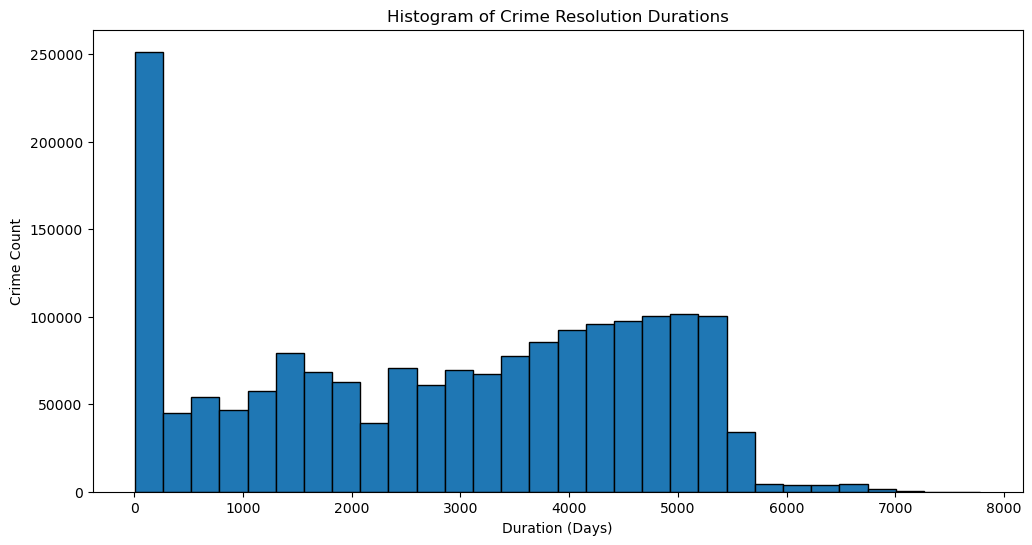

In [114]:
plt.figure(figsize=(12, 6))  # Optional: to set the figure size
plt.hist(arrested['Duration'], bins=30, edgecolor='black')  # bins can be adjusted
plt.title('Histogram of Crime Resolution Durations')
plt.xlabel('Duration (Days)')
plt.ylabel('Crime Count')
plt.show()

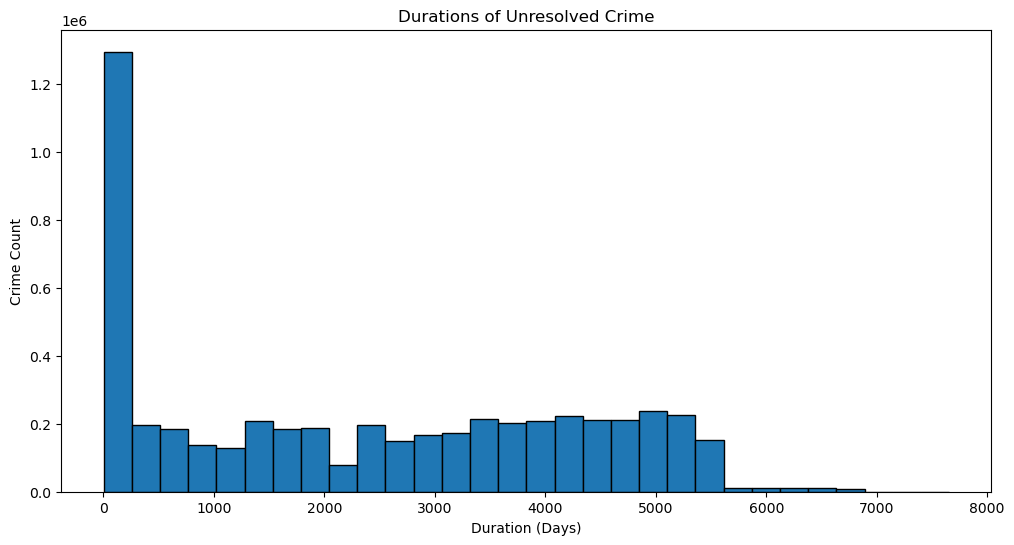

In [115]:
plt.figure(figsize=(12, 6)) 
plt.hist(unarrested['Duration'], bins=30, edgecolor='black') 
plt.title('Durations of Unresolved Crime')
plt.xlabel('Duration (Days)')
plt.ylabel('Crime Count')
plt.show()

_Histogram doesn't seem to show any distribution_

### RESOLUTION & CRIME TYPE

#### NUMBER OF ARREST

In [116]:
## Count the number of crimes for each primary type and arrest status
arrest_count = crime_db2.groupby(['Primary Type', 'Arrest']).size().reset_index(name='Count')
arr_count_pivot = arrest_count.pivot(index='Primary Type', columns='Arrest', values='Count').fillna(0)
arr_count_pivot

Arrest,False,True
Primary Type,,
ARSON,10229,1362
ASSAULT,365826,95001
BATTERY,991039,276482
BURGLARY,356844,21250
CONCEALED CARRY LICENSE VIOLATION,44,1179
CRIMINAL DAMAGE,745899,51297
CRIMINAL SEXUAL ASSAULT,27859,4180
CRIMINAL TRESPASS,60183,130281
DECEPTIVE PRACTICE,292181,38287


In [117]:
arr_count_pivot.columns = ['No', 'Yes']
arr_count_pivot.columns

Index(['No', 'Yes'], dtype='object')

In [118]:
top5

['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT']

In [119]:
## Filter out top 5 types with highest count to study the proportion of arrested and not arrested cases
top5_count = crime_db2[crime_db2['Primary Type'].isin(top5)]
top5_arr_count = top5_count.groupby(['Primary Type', 'Arrest']).size().reset_index(name='Count')
top5_arr_count

,Primary Type,Arrest,Count
0,ASSAULT,False,365826
1,ASSAULT,True,95001
2,BATTERY,False,991039
3,BATTERY,True,276482
4,CRIMINAL DAMAGE,False,745899
5,CRIMINAL DAMAGE,True,51297
6,NARCOTICS,False,4707
7,NARCOTICS,True,644671
8,THEFT,False,1330378
9,THEFT,True,156514


In [120]:
top5_arr_pivot = top5_arr_count.pivot(index='Primary Type', columns='Arrest', values='Count').fillna(0)
top5_arr_pivot

Arrest,False,True
Primary Type,,
ASSAULT,365826,95001
BATTERY,991039,276482
CRIMINAL DAMAGE,745899,51297
NARCOTICS,4707,644671
THEFT,1330378,156514


<Figure size 1200x600 with 0 Axes>

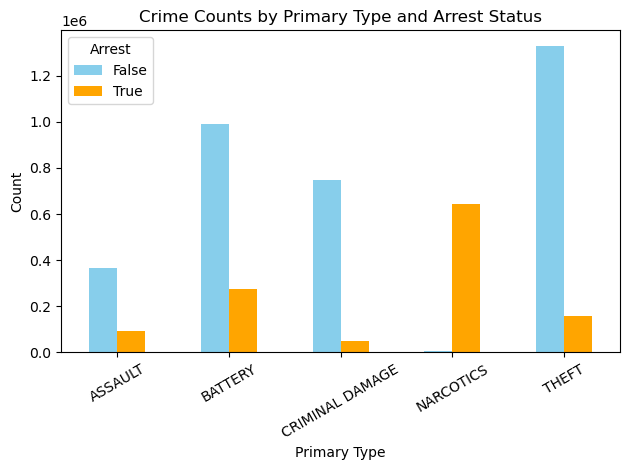

In [121]:
## Create a side-by-side bar plot for each crime type
plt.figure(figsize=(12, 6))
top5_arr_pivot.plot(kind='bar', color=["skyblue", "orange"])
plt.xlabel('Primary Type')
plt.ylabel('Count')
plt.title('Crime Counts by Primary Type and Arrest Status')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

_Theft had the highest count overall, but also had the highest no. unarrested cases. This could indicate challenges in solving theft cases or different prioritization in law enforcement._
_Narcotics had the highest no. arrested cases. This could be due to the nature of narcotics enforcement or policies._

#### RESOLUTION DISTRIBUTION

_Only taking into account the arrested cases_

In [122]:
# For 5 most common crimes, not with highest arrest rate
top5_comm_arr = arrested[arrested['Primary Type'].isin(top5)]
top5_comm_arr['Primary Type'].unique()

array(['BATTERY', 'THEFT', 'CRIMINAL DAMAGE', 'ASSAULT', 'NARCOTICS'],
      dtype=object)

<Figure size 1200x600 with 0 Axes>

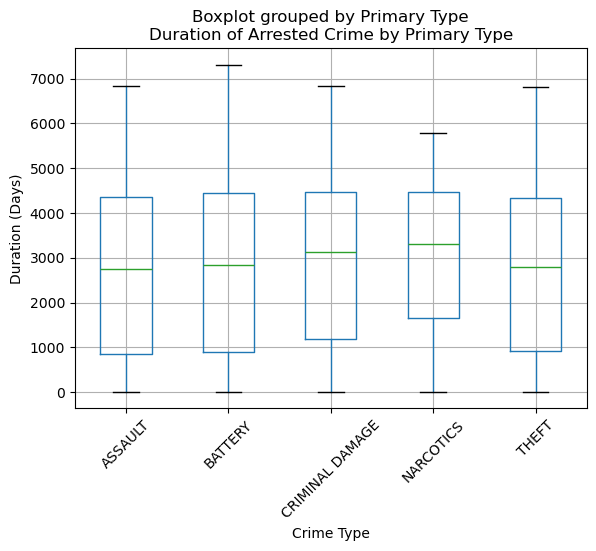

In [123]:
plt.figure(figsize=(12, 6))
top5_comm_arr.boxplot(column='Duration', by='Primary Type')
plt.title('Duration of Arrested Crime by Primary Type')
plt.ylabel('Duration (Days)')
plt.xlabel('Crime Type')
plt.xticks(rotation=45)
plt.show()

- _With the table of arrest percentage, narcotics with highest % arrest has the shortest range of resolution rate. Might be because of the investigation length or legal processes of this particular crime_
- _The long duration might contribute in fewer crimes being solved - lost priority over time maybe_

In [124]:
top5_comm_arr

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Community Area,Year,Updated On,Duration
4,13274752,JG501049,2023-11-12 07:59:00,S COTTAGE GROVE AVE,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,44.0,2023,2023-12-09 15:41:24,27
38,13041906,JG203447,2022-10-15 01:30:00,W WRIGHTWOOD AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,19.0,2022,2023-09-14 15:41:59,334
47,13179181,JG386523,2023-08-17 15:15:00,N MILWAUKEE AVE,THEFT,RETAIL THEFT,DEPARTMENT STORE,True,False,22.0,2023,2023-09-14 15:41:59,28
49,13179344,JG386917,2023-08-17 19:25:00,N ELBRIDGE AVE,THEFT,RETAIL THEFT,STREET,True,False,21.0,2023,2023-09-14 15:41:59,27
50,13181797,JG389859,2023-08-20 04:30:00,N LEAMINGTON AVE,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,True,True,19.0,2023,2023-09-14 15:41:59,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8113872,13112389,JG307020,2023-06-19 10:17:00,W JACKSON BLVD,BATTERY,AGGRAVATED POLICE OFFICER - OTHER DANGEROUS WE...,STREET,True,False,26.0,2023,2023-08-19 15:40:26,61
8113877,13057820,JG242238,2023-04-29 00:00:00,W 35TH ST,BATTERY,SIMPLE,SPORTS ARENA / STADIUM,True,False,34.0,2023,2023-08-19 15:40:26,112
8113897,13136688,JG336313,2023-07-11 08:00:00,W ROOSEVELT RD,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,29.0,2023,2023-08-19 15:40:26,39
8113903,13199821,JG411407,2023-09-05 01:57:00,S EXCHANGE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,46.0,2023,2023-09-13 15:42:41,8


In [125]:
from scipy.stats import f_oneway

battery_durations = top5_comm_arr['Duration'][top5_comm_arr['Primary Type'] == 'BATTERY']
theft_durations = top5_comm_arr['Duration'][top5_comm_arr['Primary Type'] == 'THEFT']
criminal_damage_durations = top5_comm_arr['Duration'][top5_comm_arr['Primary Type'] == 'CRIMINAL DAMAGE']
narcotics_durations = top5_comm_arr['Duration'][top5_comm_arr['Primary Type'] == 'NARCOTICS']
assault_durations = top5_comm_arr['Duration'][top5_comm_arr['Primary Type'] == 'ASSAULT']

# Perform the ANOVA
anova_results = f_oneway(battery_durations, theft_durations, criminal_damage_durations, narcotics_durations, assault_durations)

# Display the results
print(f"ANOVA F-statistic: {anova_results.statistic}")
print(f"ANOVA p-value: {anova_results.pvalue}")

ANOVA F-statistic: 2791.2117694175367
ANOVA p-value: 0.0


_p-value<0.05 so reject the null hypothesis that there is no difference between the mean rr of 5 most common crime types_

In [126]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=top5_comm_arr['Duration'], groups=top5_comm_arr['Primary Type'], alpha=0.05)

# Display the results
print(tukey)


           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
     group1          group2      meandiff p-adj   lower     upper   reject
--------------------------------------------------------------------------
        ASSAULT         BATTERY   69.6336   0.0   51.3945   87.8728   True
        ASSAULT CRIMINAL DAMAGE  188.4106   0.0  161.8376  214.9836   True
        ASSAULT       NARCOTICS  377.0012   0.0  360.1466  393.8558   True
        ASSAULT           THEFT  -13.0818  0.38  -33.0286     6.865  False
        BATTERY CRIMINAL DAMAGE   118.777   0.0   95.4616  142.0924   True
        BATTERY       NARCOTICS  307.3676   0.0  296.3422   318.393   True
        BATTERY           THEFT  -82.7155   0.0  -98.0568  -67.3741   True
CRIMINAL DAMAGE       NARCOTICS  188.5906   0.0  166.3416  210.8397   True
CRIMINAL DAMAGE           THEFT -201.4924   0.0 -226.1666 -176.8182   True
      NARCOTICS           THEFT  -390.083   0.0 -403.7494 -376.4167   True
-------------------------

### RESOLUTION & COMMUNITY

#### NUMBER OF ARREST

In [127]:
top5_comm_count = top5_comm.groupby(['Community', 'Arrest']).size().reset_index(name='Count')
top5_comm_count

,Community,Arrest,Count
0,AUSTIN,False,275388
1,AUSTIN,True,160720
2,HUMBOLDT PARK,False,136831
3,HUMBOLDT PARK,True,80951
4,NEAR NORTH SIDE,False,187227
5,NEAR NORTH SIDE,True,61041
6,NEAR WEST SIDE,False,164136
7,NEAR WEST SIDE,True,49495
8,SOUTH SHORE,False,179919
9,SOUTH SHORE,True,51783


In [128]:
top5_comm_pivot = top5_comm_count.pivot(index='Community', columns='Arrest', values='Count').fillna(0)
top5_comm_pivot

Arrest,False,True
Community,,
AUSTIN,275388,160720
HUMBOLDT PARK,136831,80951
NEAR NORTH SIDE,187227,61041
NEAR WEST SIDE,164136,49495
SOUTH SHORE,179919,51783


<Figure size 1200x600 with 0 Axes>

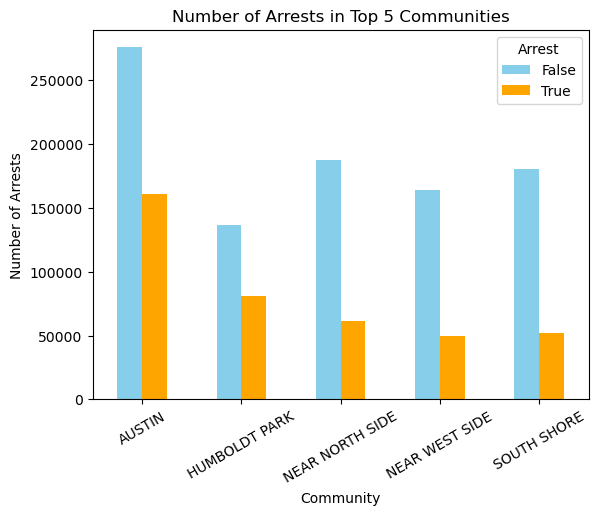

In [129]:
## Create side-by-side bar plot for the number of arrest cases in each community
plt.figure(figsize=(12, 6))
top5_comm_pivot.plot(kind='bar', color=["skyblue", "orange"])
plt.title('Number of Arrests in Top 5 Communities')
plt.xlabel('Community')
plt.xticks(rotation=30)
plt.ylabel('Number of Arrests')
plt.show()

_Austin had the highest no. arrested cases. Humboldt Park had more cases but had fewer no. arrested cases_

In [130]:
arrested['Duration'].mean()

2830.743161817597

In [131]:
unarrested['Duration'].mean()

2355.5070690517327

#### RESOLUTION RATE DISTRIBUTION

In [132]:
## Create a df for top 5 communities with only arrest cases
arrested_comm = joined_loc[joined_loc['Community'].isin(top5_names) & joined_loc['Arrest']==True]
arrested_comm['Duration']=arrested_comm['Updated On']-arrested_comm['Date']
arrested_comm['Duration'] = arrested_comm['Duration'].dt.days
arrested_comm

/var/folders/_m/nd4zplkd1xd1v4xx1_w8jp1r0000gn/T/ipykernel_11195/1392894541.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arrested_comm['Duration']=arrested_comm['Updated On']-arrested_comm['Date']
/var/folders/_m/nd4zplkd1xd1v4xx1_w8jp1r0000gn/T/ipykernel_11195/1392894541.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arrested_comm['Duration'] = arrested_comm['Duration'].dt.days


,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Community Area,Year,Updated On,Month,Hour,Community,Duration
36,12990873,JG161829,2019-08-17 13:14:00,N KARLOV AVE,OFFENSE INVOLVING CHILDREN,CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,True,True,11.0,37.0,23.0,2019,2023-09-14 15:41:59,8,13,HUMBOLDT PARK,1489
60,13190179,JG399829,2023-08-27 13:16:00,W NORTH AVE,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,14.0,26.0,23.0,2023,2023-09-14 15:41:59,8,13,HUMBOLDT PARK,18
63,13192516,JG402535,2023-08-29 13:59:00,N LOCKWOOD AVE,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,True,True,25.0,37.0,25.0,2023,2023-09-14 15:41:59,8,13,AUSTIN,16
69,13197242,JG408409,2023-09-02 16:28:00,N NEWCASTLE AVE,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,RESIDENCE,True,False,25.0,29.0,25.0,2023,2023-09-14 15:41:59,9,16,AUSTIN,11
78,13200685,JG412660,2023-09-05 19:18:00,N CENTRAL AVE,OTHER OFFENSE,FALSE / STOLEN / ALTERED TRP,STREET,True,False,25.0,29.0,25.0,2023,2023-09-14 15:41:59,9,19,AUSTIN,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003127,13087791,JG278030,2023-05-28 03:45:00,W DIVISION ST,BATTERY,SIMPLE,BAR OR TAVERN,True,False,18.0,2.0,8.0,2023,2023-08-19 15:40:26,5,3,NEAR NORTH SIDE,83
7003211,13071279,JG258701,2023-05-13 01:02:00,S YATES BLVD,ASSAULT,SIMPLE,APARTMENT,True,True,4.0,7.0,43.0,2023,2023-08-19 15:40:26,5,1,SOUTH SHORE,98
7003255,13133670,JG332851,2023-07-08 13:57:00,N CENTRAL AVE,OTHER OFFENSE,SEX OFFENDER - FAIL TO REGISTER,SIDEWALK,True,False,25.0,37.0,25.0,2023,2023-08-19 15:40:26,7,13,AUSTIN,42
7003277,13162378,JG366893,2023-08-02 18:30:00,W NORTH AVE,BATTERY,SIMPLE,SIDEWALK,True,False,25.0,37.0,25.0,2023,2023-08-19 15:40:26,8,18,AUSTIN,16


<Figure size 1200x600 with 0 Axes>

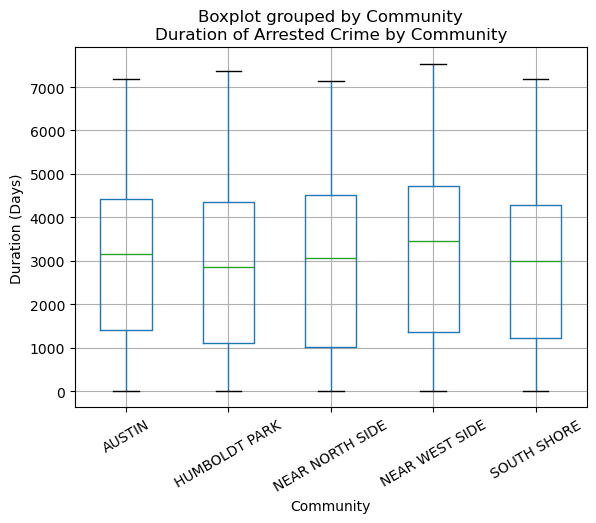

In [133]:
plt.figure(figsize=(12, 6))
arrested_comm.boxplot(column='Duration', by='Community')
plt.title('Duration of Arrested Crime by Community')
plt.ylabel('Duration (Days)')
plt.xlabel('Community')
plt.xticks(rotation=30)
plt.show()

_All had median around 3000-3500 days. The communities appear to have fairly similar IQRs, meaning that the spread of the middle 50% of crime durations is somewhat consistent across communities._

### RESOLUTION RATE & MONTH

#### NUMBER OF ARREST

In [134]:
monthly_rela = crime_db2.groupby(['Month', 'Arrest']).size().reset_index(name='Count')
monthly_rela

,Month,Arrest,Count
0,1,False,398692
1,1,True,147580
2,2,False,342857
3,2,True,137387
4,3,False,415824
5,3,True,155632
6,4,False,420234
7,4,True,147706
8,5,False,463229
9,5,True,157317


In [135]:
monthly_rela_pivot = monthly_rela.pivot(index='Month', columns='Arrest', values='Count').fillna(0)
monthly_rela_pivot

Arrest,False,True
Month,,
1,398692,147580
2,342857,137387
3,415824,155632
4,420234,147706
5,463229,157317
6,469228,150765
7,494055,156576
8,488260,158240
9,456451,150632


<Figure size 1200x600 with 0 Axes>

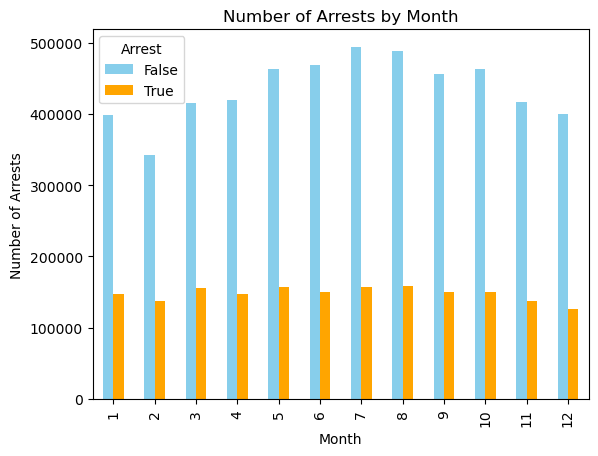

In [136]:
# Plot side-by-side bar charts for each month arrest vs. not arrest cases
plt.figure(figsize=(12, 6))
monthly_rela_pivot.plot(kind='bar', color=["skyblue", "orange"])
plt.title('Number of Arrests by Month')
plt.xlabel('Month')
plt.ylabel('Number of Arrests')
plt.show()

- _The number of unresolved cases (indicated by False) is consistently higher than resolved cases (indicated by True) across all months_
- _The overall pattern does not seem to change drastically from month to month, indicating that the resolution rates remain relatively stable throughout the year._

#### DISTRIBUTION OF DURATION

In [137]:
## Create a column for month
arrested['Month'] = arrested['Date'].dt.month
arrested

/var/folders/_m/nd4zplkd1xd1v4xx1_w8jp1r0000gn/T/ipykernel_11195/2930545671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arrested['Month'] = arrested['Date'].dt.month


,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Community Area,Year,Updated On,Duration,Month
1,25953,JE240540,2021-05-24 15:06:00,N LARAMIE AVE,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,19.0,2021,2023-11-18 15:39:49,908,5
2,26038,JE279849,2021-06-26 09:24:00,N MC CORMICK RD,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,13.0,2021,2023-11-18 15:39:49,875,6
4,13274752,JG501049,2023-11-12 07:59:00,S COTTAGE GROVE AVE,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,44.0,2023,2023-12-09 15:41:24,27,11
25,12218064,JD426642,2020-10-30 16:30:00,E 82ND ST,CRIMINAL SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,True,45.0,2020,2023-09-14 15:41:59,1048,10
26,12342615,JE202211,2021-04-17 15:20:00,S PRAIRIE AVE,ROBBERY,VEHICULAR HIJACKING,RESIDENCE,True,False,44.0,2021,2023-09-14 15:41:59,880,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8113872,13112389,JG307020,2023-06-19 10:17:00,W JACKSON BLVD,BATTERY,AGGRAVATED POLICE OFFICER - OTHER DANGEROUS WE...,STREET,True,False,26.0,2023,2023-08-19 15:40:26,61,6
8113877,13057820,JG242238,2023-04-29 00:00:00,W 35TH ST,BATTERY,SIMPLE,SPORTS ARENA / STADIUM,True,False,34.0,2023,2023-08-19 15:40:26,112,4
8113897,13136688,JG336313,2023-07-11 08:00:00,W ROOSEVELT RD,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,29.0,2023,2023-08-19 15:40:26,39,7
8113903,13199821,JG411407,2023-09-05 01:57:00,S EXCHANGE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,46.0,2023,2023-09-13 15:42:41,8,9


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


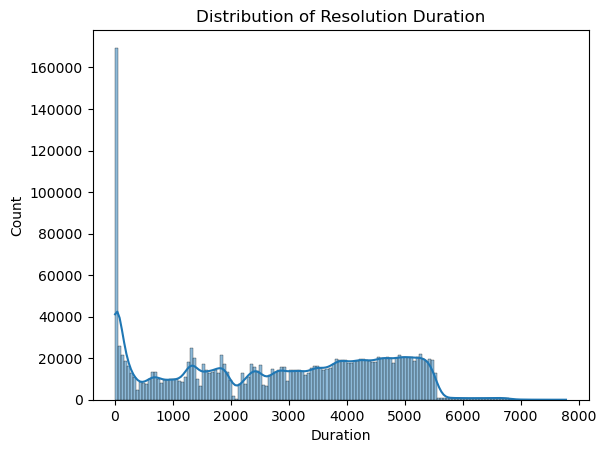

In [138]:
sns.histplot(arrested['Duration'], kde=True)
plt.title('Distribution of Resolution Duration')
plt.show()

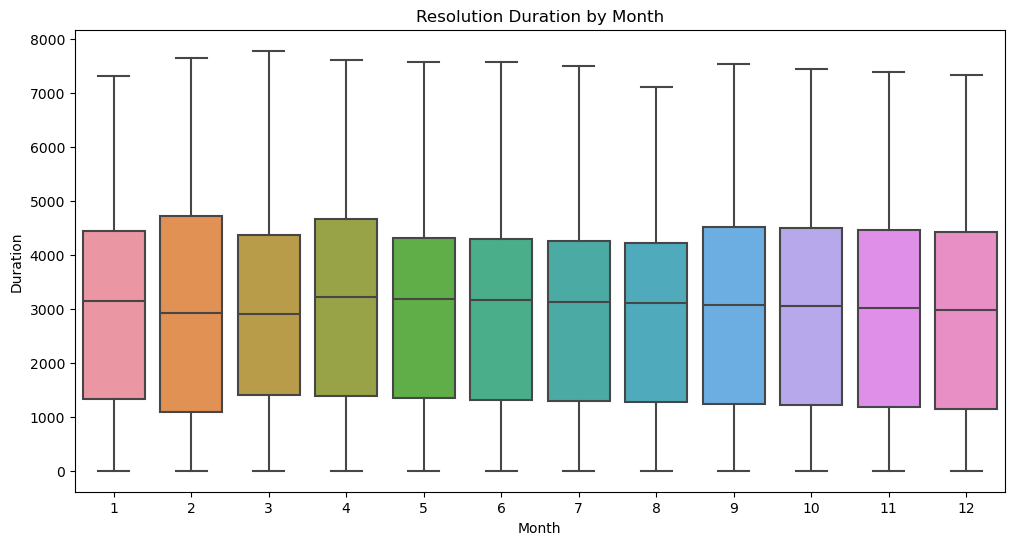

In [139]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Duration', data=arrested)
plt.title('Resolution Duration by Month')
plt.show()

- _The median duration (middle line of the boxes) appears consistent across the months, indicating that the time taken to resolve crimes does not vary significantly by month._
- _The interquartile range (the box itself) and the range (whiskers) also do not show significant changes from month to month, suggesting that the variability in resolution time is relatively uniform throughout the year._

In [140]:
ps_corr = arrested['Month'].corr(arrested['Duration'], method='pearson')
print(f"Pearson correlation coefficient: {ps_corr}")

Pearson correlation coefficient: -0.03366064753634926


_The resolution rate and the month it occurred do not have correlation_

### RESOLUTION & SPECIFIC LOCATIONS

In [141]:
# List of 5 most common location descriptions
top5_locdesc = ['STREET', 'RESIDENCE', 'APARTMENT', 'SIDEWALK', 'PARKING LOT/GARAGE(NON.RESID.)']

In [142]:
# Extract count of cases for each of 5 most common location descriptions
top5_ld = crime_db3[crime_db3['Location Description'].isin(top5_locdesc)].groupby(['Location Description', 'Arrest']).size().reset_index(name='Count')
top5_ld

,Location Description,Arrest,Count
0,APARTMENT,False,718659
1,APARTMENT,True,131985
2,PARKING LOT/GARAGE(NON.RESID.),False,165009
3,PARKING LOT/GARAGE(NON.RESID.),True,37728
4,RESIDENCE,False,997165
5,RESIDENCE,True,147640
6,SIDEWALK,False,343261
7,SIDEWALK,True,331666
8,STREET,False,1317181
9,STREET,True,467238


In [143]:
top5_ld_pivot = top5_ld.pivot(index='Location Description', columns='Arrest', values='Count').fillna(0)
top5_ld_pivot

Arrest,False,True
Location Description,,
APARTMENT,718659,131985
PARKING LOT/GARAGE(NON.RESID.),165009,37728
RESIDENCE,997165,147640
SIDEWALK,343261,331666
STREET,1317181,467238


In [144]:
# Replace PARKING LOT/GARAGE(NON.RESID.) to PUBLIC PARKING
top5_ld_pivot.index = top5_ld_pivot.index.str.replace('PARKING LOT/GARAGE(NON.RESID.)', 'PUBLIC PARKING')

<Figure size 1200x600 with 0 Axes>

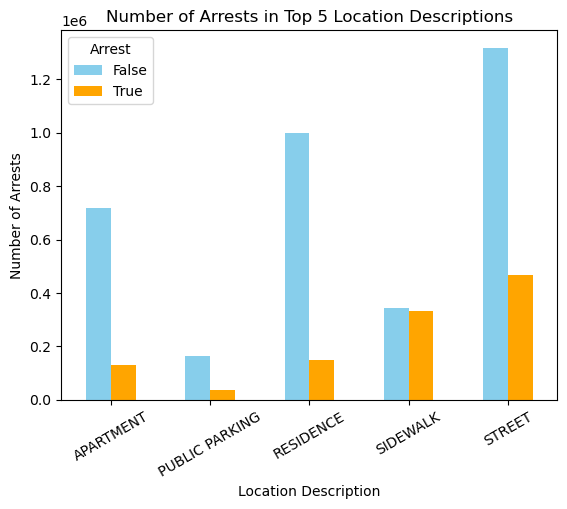

In [145]:
plt.figure(figsize=(12, 6))
top5_ld_pivot.plot(kind='bar', color=["skyblue", "orange"])
plt.title('Number of Arrests in Top 5 Location Descriptions')
plt.xlabel('Location Description')
plt.xticks(rotation=30)
plt.ylabel('Number of Arrests')
plt.show()

In [146]:
arrested_loc = arrested[arrested['Location Description'].isin(top5_locdesc)]
arrested_loc

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Community Area,Year,Updated On,Duration,Month
1,25953,JE240540,2021-05-24 15:06:00,N LARAMIE AVE,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,19.0,2021,2023-11-18 15:39:49,908,5
25,12218064,JD426642,2020-10-30 16:30:00,E 82ND ST,CRIMINAL SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,True,45.0,2020,2023-09-14 15:41:59,1048,10
26,12342615,JE202211,2021-04-17 15:20:00,S PRAIRIE AVE,ROBBERY,VEHICULAR HIJACKING,RESIDENCE,True,False,44.0,2021,2023-09-14 15:41:59,880,4
33,12785595,JF346553,2022-08-05 21:00:00,S UNIVERSITY AVE,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False,69.0,2022,2023-09-14 15:41:59,404,8
37,12990873,JG161829,2019-08-17 13:14:00,N KARLOV AVE,OFFENSE INVOLVING CHILDREN,CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,True,True,23.0,2019,2023-09-14 15:41:59,1489,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8113830,13113573,JG308934,2023-06-20 17:39:00,S HOUSTON AVE,BATTERY,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...",APARTMENT,True,True,46.0,2023,2023-08-19 15:40:26,59,6
8113844,13107023,JG301165,2023-06-14 16:00:00,S KIMBARK AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,41.0,2023,2023-08-19 15:40:26,65,6
8113849,13057758,JG242228,2023-04-29 20:43:00,W ADAMS ST,NARCOTICS,FOUND SUSPECT NARCOTICS,STREET,True,False,26.0,2023,2023-08-19 15:40:26,111,4
8113872,13112389,JG307020,2023-06-19 10:17:00,W JACKSON BLVD,BATTERY,AGGRAVATED POLICE OFFICER - OTHER DANGEROUS WE...,STREET,True,False,26.0,2023,2023-08-19 15:40:26,61,6


In [147]:
# Replace PARKING LOT/GARAGE(NON.RESID.) to PUBLIC PARKING
arrested_loc['Location Description'] = arrested_loc['Location Description'].replace('PARKING LOT / GARAGE (NON RESIDENTIAL)', 'PUBLIC PARKING')

/var/folders/_m/nd4zplkd1xd1v4xx1_w8jp1r0000gn/T/ipykernel_11195/861841220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arrested_loc['Location Description'] = arrested_loc['Location Description'].replace('PARKING LOT / GARAGE (NON RESIDENTIAL)', 'PUBLIC PARKING')


<Figure size 1200x600 with 0 Axes>

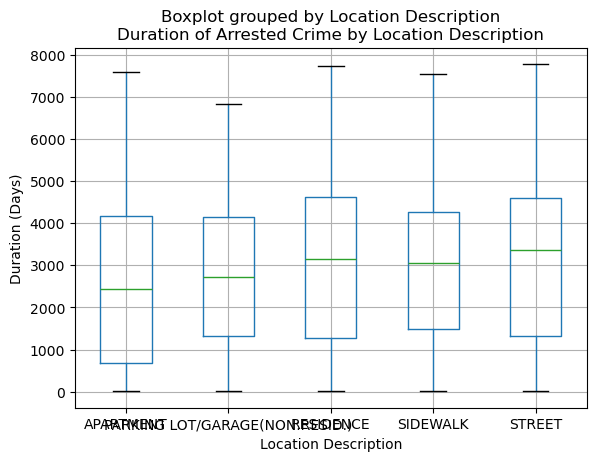

In [148]:
plt.figure(figsize=(12, 6))
arrested_loc.boxplot(column='Duration', by='Location Description')
plt.title('Duration of Arrested Crime by Location Description')
plt.ylabel('Duration (Days)')
plt.xlabel('Location Description')
# plt.xticks(rotation=30)
plt.show()

In [149]:
all_loc = crime_db3['Location Description'].unique()
all_loc_series = pd.Series(all_loc)
all_loc_series[all_loc_series.str.contains('RESIDENCE', case=False, na=False)]

6                         RESIDENCE - GARAGE
7                RESIDENCE - PORCH / HALLWAY
9                                  RESIDENCE
28           RESIDENCE - YARD (FRONT / BACK)
42     COLLEGE / UNIVERSITY - RESIDENCE HALL
132                  RESIDENCE PORCH/HALLWAY
134                         RESIDENCE-GARAGE
201        COLLEGE/UNIVERSITY RESIDENCE HALL
dtype: object

In [150]:
crime_db3['Location Description']=crime_db3['Location Description'].replace({'RESIDENCE - GARAGE':'RESIDENCE-GARAGE'})
crime_db3['Location Description']=crime_db3['Location Description'].replace({'RESIDENCE - PORCH / HALLWAY':'RESIDENCE PORCH/HALLWAY'})
crime_db3['Location Description']=crime_db3['Location Description'].replace({'COLLEGE / UNIVERSITY - RESIDENCE HALL':'COLLEGE/UNIVERSITY RESIDENCE HALL'})

/var/folders/_m/nd4zplkd1xd1v4xx1_w8jp1r0000gn/T/ipykernel_11195/261567512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_db3['Location Description']=crime_db3['Location Description'].replace({'RESIDENCE - GARAGE':'RESIDENCE-GARAGE'})
/var/folders/_m/nd4zplkd1xd1v4xx1_w8jp1r0000gn/T/ipykernel_11195/261567512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_db3['Location Description']=crime_db3['Location Description'].replace({'RESIDENCE - PORCH / HALLWAY':'RESIDENCE PORCH/HALLWAY'})
/var

In [151]:
all_loc = crime_db3['Location Description'].unique()
all_loc_series = pd.Series(all_loc)
all_loc_series[all_loc_series.str.contains('RESIDENCE', case=False, na=False)]

6                      RESIDENCE-GARAGE
7               RESIDENCE PORCH/HALLWAY
9                             RESIDENCE
28      RESIDENCE - YARD (FRONT / BACK)
42    COLLEGE/UNIVERSITY RESIDENCE HALL
dtype: object

In [152]:
by_loc_desc.sort_values('Crime Count', ascending=False).head(10)

,Location Description,Crime Count
183,STREET,1784419
154,RESIDENCE,1144805
17,APARTMENT,850644
178,SIDEWALK,674927
135,OTHER,228305
142,PARKING LOT/GARAGE(NON.RESID.),202737
15,ALLEY,155645
179,SMALL RETAIL STORE,137133
175,"SCHOOL, PUBLIC, BUILDING",125062
161,RESTAURANT,117597


In [153]:
all_loc_series[all_loc_series.str.contains('RESIDE', case=False, na=False)]

6                       RESIDENCE-GARAGE
7                RESIDENCE PORCH/HALLWAY
9                              RESIDENCE
21                DRIVEWAY - RESIDENTIAL
28       RESIDENCE - YARD (FRONT / BACK)
42     COLLEGE/UNIVERSITY RESIDENCE HALL
119        RESIDENTIAL YARD (FRONT/BACK)
dtype: object

In [154]:
crime_db3['Location Description']=crime_db3['Location Description'].replace({' RESIDENCE - YARD (FRONT / BACK)':'RESIDENTIAL YARD (FRONT/BACK)'})

/var/folders/_m/nd4zplkd1xd1v4xx1_w8jp1r0000gn/T/ipykernel_11195/224128915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_db3['Location Description']=crime_db3['Location Description'].replace({' RESIDENCE - YARD (FRONT / BACK)':'RESIDENTIAL YARD (FRONT/BACK)'})


In [155]:
count_by_locdesc = crime_db3.groupby('Location Description').size().sort_values(ascending=False)
count_by_locdesc

Location Description
STREET                   1784419
RESIDENCE                1144805
APARTMENT                 850644
SIDEWALK                  674927
OTHER                     228305
                          ...   
PRAIRIE                        1
PUBLIC GRAMMAR SCHOOL          1
CHA ELEVATOR                   1
TRUCKING TERMINAL              1
ROOF                           1
Length: 208, dtype: int64

In [156]:
## Find the percentage of each location description
by_loc_desc['Percentage'] = by_loc_desc['Crime Count'] / by_loc_desc['Crime Count'].sum() * 100
by_loc_desc.sort_values('Crime Count', ascending=False).head(10)

,Location Description,Crime Count,Percentage
183,STREET,1784419,25.520779
154,RESIDENCE,1144805,16.373013
17,APARTMENT,850644,12.165919
178,SIDEWALK,674927,9.652813
135,OTHER,228305,3.265220
142,PARKING LOT/GARAGE(NON.RESID.),202737,2.899547
15,ALLEY,155645,2.226036
179,SMALL RETAIL STORE,137133,1.961278
175,"SCHOOL, PUBLIC, BUILDING",125062,1.788638
161,RESTAURANT,117597,1.681874


# Export for visualization

In [157]:
crime_db2.to_csv('crime_db.csv', index=False, sep=';', encoding='utf-8')


In [164]:
joined_loc.to_csv('joined_loc2.csv', index=False, sep=';', encoding='utf-8')

In [160]:
## Create a column for country and city
joined_loc['Country'] = 'USA'

In [161]:
joined_loc['City'] = 'Chicago'

In [162]:
joined_loc

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Community Area,Year,Updated On,Month,Hour,Community,Country,City
0,5741943,HN549294,2007-08-25 09:22:18,N ROGERS AVE,ASSAULT,SIMPLE,OTHER,False,False,24.0,49.0,1.0,2007,2015-08-17 15:03:40,8,9,ROGERS PARK,USA,Chicago
1,25953,JE240540,2021-05-24 15:06:00,N LARAMIE AVE,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,25.0,36.0,19.0,2021,2023-11-18 15:39:49,5,15,BELMONT CRAGIN,USA,Chicago
2,26038,JE279849,2021-06-26 09:24:00,N MC CORMICK RD,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,17.0,50.0,13.0,2021,2023-11-18 15:39:49,6,9,NORTH PARK,USA,Chicago
3,13279676,JG507211,2023-11-09 07:30:00,W BYRON ST,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,19.0,47.0,5.0,2023,2023-11-18 15:39:49,11,7,NORTH CENTER,USA,Chicago
4,13274752,JG501049,2023-11-12 07:59:00,S COTTAGE GROVE AVE,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,6.0,6.0,44.0,2023,2023-12-09 15:41:24,11,7,CHATHAM,USA,Chicago
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003463,13047495,JG229914,2023-04-18 08:00:00,N JEFFERSON ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,12.0,42.0,28.0,2023,2023-08-19 15:40:26,4,8,NEAR WEST SIDE,USA,Chicago
7003464,13168300,JG373901,2023-08-07 18:00:00,W 95TH ST,ROBBERY,ARMED - HANDGUN,SIDEWALK,False,False,6.0,9.0,49.0,2023,2023-08-19 15:40:26,8,18,ROSELAND,USA,Chicago
7003465,13114024,JG309527,2023-06-20 19:00:00,S AVERS AVE,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,10.0,22.0,30.0,2023,2023-08-19 15:40:26,6,19,SOUTH LAWNDALE,USA,Chicago
7003466,13188860,JG398340,2023-08-26 00:00:00,S SOUTH SHORE DR,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,4.0,7.0,46.0,2023,2023-09-02 15:41:45,8,0,SOUTH CHICAGO,USA,Chicago
